In [ ]:
#          #########################################################################
#          #                           IN THE NAME OF ALLAH                        #
#          #             BRIDGE SUPERSTRUCTURE INELASTIC RESPONSE SPECTRUM         #
#          #-----------------------------------------------------------------------#
#          #              THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI            #
#          #                   EMAIL: salar.d.ghashghaei@gmail.com                 #
#          #########################################################################

In [ ]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(30, 16))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_RAILROAD_TRUSS_BRIDGE.png'    
PLOT_IMAGE(image_path)

In [ ]:
'https://www.youtube.com/watch?v=TFPDMFxH1L8' # YOUTUBE VIDEO
'https://www.flickr.com/photos/cmhpictures/44514580700/in/photostream/'# TRUSS BRIDGE IMAGES
'https://www.sciencedirect.com/science/article/pii/S1877705813007509#aep-abstract-id9' #PAPER

In [ ]:
#import the os module
import os
import math
import time
import numpy as np
import openseespy.opensees as op

In [ ]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

In [ ]:
FOLDER_NAME = 'TRUSS_RESPONSE_SPECTRUM'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [ ]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [ ]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4f}')
    print(f'First quartile: {q1:.4f}')
    #print(f'Mode: {MODE:.4f}')
    print(f'Median: {MEDIAN:.4f}')
    print(f'Mean: {MEAN:.4f}')
    print(f'Std: {STD:.4f}')
    print(f'Third quartile: {q3:.4f}')
    print(f'Maximum: {MAXIMUM :.4f}')
    print(f'Skewness: {skew(X) :.4f}')
    print(f'kurtosis: {kurtosis(X) :.4f}')
    print(f"90% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4f}")
    plt.text(q3, 1.05, f" Q3: {q3:.4f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------    
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show()     
# -----------------------------------------------
def PLOT_TIME_HIS(x, xlabel, y1, y1label, y2, y2label, y3, y3label, y4, y4label, Z, LOGX, LOGY):
    ## PLOT THE DATA
    import numpy as np
    import matplotlib.pyplot as plt
    # Define colors for each dataset
    colors = ['b', 'g', 'r', 'c']

    # Create subplots based on the value of Z
    fig, axs = plt.subplots(Z, 1, figsize=(14, 14))

    # Plot each dataset with a different color
    for i, y_data in enumerate([y1, y2, y3, y4][:Z]):
        axs[i].plot(x, y_data, color=colors[i])
        axs[i].set_title(f"{[y1label, y2label, y3label, y4label][i]} - MAX ABS: {np.max(np.abs(y_data)):.6e}")
        axs[i].set_xlabel(xlabel)
        #axs[i].set_ylabel()
        axs[i].grid()
        if LOGX == 1:
            axs[i].semilogx()
        if LOGY == 1:
            axs[i].semilogy()    

    # Adjust layout
    plt.tight_layout()
    plt.show()  
# -----------------------------------------------    
def MAXABS_FUN(DATA_FILE, COLUMN, I, J, Z):
    import numpy as np
    # Read and process displacement data
    if Z == 1:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))
    if Z == 2:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}_{J}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))    
    #print("MAX. ABS. :", MAXABS)
    return MAXABS
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, XLABEL, YLABEL, TITLE, COLOR, Z):
    import matplotlib.pyplot as plt
    if Z == 1:
        # Plot 1 line
        plt.figure(figsize=(12, 8))
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend(['curve', 'bilinear fitted'], loc='lower right')
        plt.grid(True)
        plt.show()
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(FOLDER, X, COLUMN, I, Z):
    import numpy as np
    # Time History
    if Z == 1:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]
    if Z == 2:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}_{I}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]    
    return X 
# -----------------------------------------------
def BILNEAR_CURVE(Cur, Mom, SLOPE_NODE):
    import numpy as np
    # bilinear fitting
    SIZE = len(Mom)
    hh = np.zeros(SIZE-1)
    Aa = np.zeros(SIZE-1)
    for i in range(SIZE-1):
        hh[i] = Cur[i+1] - Cur[i]
        Aa[i] = (Mom[i] + Mom[i+1]) * 0.5 * hh[i]

    Area = sum(Aa)
    k0 = Mom[SLOPE_NODE] / Cur[SLOPE_NODE]
    fiy = (Mom[i+1] * max(Cur) * 0.5 - Area) / (Mom[i+1] * 0.5 - k0 * max(Cur) * 0.5)
    My = k0 * fiy
    X = np.array([0, fiy, max(Cur)])
    Y = np.array([0, My, Mom[i+1]])
    """
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('     Disp       Baser Shear')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    """
    # EI and Ductility_Rito of Unconfined Section
    Elastic_ST = Y[1] / X[1]
    Plastic_ST = Y[2] / X[2]
    Tangent_ST = (Y[2] - Y[1]) / (X[2] - X[1])
    Ductility_Rito = X[2] / X[1]
    Over_Strength_Factor = Y[2] / Y[1]
    """
    print('+----------------------------------------------------+')
    print(f' Structure Elastic Stiffness :     {Elastic_ST:.2f}')
    print(f' Structure Plastic Stiffness :     {Plastic_ST:.2f}')
    print(f' Structure Tangent Stiffness :     {Tangent_ST:.2f}')
    print(f' Structure Ductility Ratio :       {Ductility_Rito:.2f}')
    print(f' Structure Over Strength Factor:   {Over_Strength_Factor:.2f}')
    print('+----------------------------------------------------+')
    """
    return X, Y, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor
# -----------------------------------------------
def PLOT3D(X, Y, Z, XLABEL, YLABEL, ZLABEL, TITLE):
    import plotly.graph_objects as go
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=5, color=Z))])
    fig.update_layout(scene=dict(xaxis_title=XLABEL, yaxis_title=YLABEL, zaxis_title=ZLABEL), title=TITLE)
    fig.show()
# -----------------------------------------------     
# Create a scatter plot
def PLOT_SCATTER(X, Y , XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import matplotlib.pyplot as plt
    # Calculate linear regression parameters
    import numpy as np
    coefficients = np.polyfit(X, Y, ORDER)
    if ORDER == 1:
        a, b = coefficients
    if ORDER == 2:
        a, b, c = coefficients    
    if ORDER == 3:
        a, b, c, d = coefficients   
    if ORDER == 4:
        a, b, c, d, e = coefficients  
    if ORDER == 5:
        a, b, c, d, e, f = coefficients  
    if ORDER == 6:
        a, b, c, d, e, f, I = coefficients   
    if ORDER == 7:
        a, b, c, d, e, f, I, J = coefficients     
    y = [];yy = [];
    for i in range(len(X)):
        if ORDER == 1:
            y.append(a * X[i] + b)
        if ORDER == 2:
            y.append(a * X[i]**2 + b * X[i] + c)
        if ORDER == 3:
            y.append(a * X[i]**3 + b * X[i]**2 + c * X[i] + d)    
        if ORDER == 4:
            y.append(a * X[i]**4 + b * X[i]**3 + c * X[i]**2 + d * X[i] + e)  
        if ORDER == 5:
            y.append(a * X[i]**5 + b * X[i]**4 + c * X[i]**3 + d * X[i]**2 + e * X[i] + f)    
        if ORDER == 6:
            y.append(a * X[i]**6 + b * X[i]**5 + c * X[i]**4 + d * X[i]**3 + e * X[i]**2 + f * X[i] + I)     
        if ORDER == 7:
            y.append(a * X[i]**7 + b * X[i]**6 + c * X[i]**5 + d * X[i]**4 + e * X[i]**3 + f * X[i]**2 + I * X[i] + J)     
        yy.append(Y[i] - y[-1])
    y = np.array(y)    
    yy = np.array(yy) 
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    # Calculate RSS
    RSS = np.sum(yy ** 2)
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    #print(f"R-squared value: {R_squared:.4f}")
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color=COLOR, marker='o', label='Data')
    # Add labels and title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    # Add the linear regression line
    if ORDER == 1:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x + {b:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 2:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^2 + {b:.2f}x + {c:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 3:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 4:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^4 + {b:.2f}x^3 + {c:.2f}x^2 + {d:.2f}x + {e:.2f} - R^2 = {R_squared:.3f}') 
    if ORDER == 5:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^5 + {b:.2f}x^4 + {c:.2f}x^3 + {d:.2f}x^2 + {e:.2f}x + {f:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 6:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^6 + {b:.2f}x^5 + {c:.2f}x^4 + {d:.2f}x^3 + {e:.2f}x^2 + {f:.2f}x + {I:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 7:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^7 + {b:.2f}x^6 + {c:.2f}x^5 + {d:.2f}x^4 + {e:.2f}x^3 + {f:.2f}x^2 + {I:.2f}x + {J:.2f} - R^2 = {R_squared:.3f}')               
    
    plt.title(TITLE)
    plt.grid(True)
    plt.legend()
    if LOG == 1:
        plt.semilogx();plt.semilogy();
    plt.show()

# -----------------------------------------------
def PLOT_SCATTER_PLOTLY(X, Y, XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import plotly.graph_objects as go
    import numpy as np
    # Calculate linear regression parameters
    coefficients = np.polyfit(X, Y, ORDER)
    y = np.polyval(coefficients, X)
    
    # Calculate residuals
    residuals = Y - y
    
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    
    # Calculate RSS
    RSS = np.sum(residuals ** 2)
    
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    
    # Create scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', marker=dict(color=COLOR), name='Data'))
    
    # Add the regression line
    fig.add_trace(go.Scatter(x=X, y=y, mode='lines', line=dict(color='black'),
                             name=f'Fit: R^2 = {R_squared:.3f}'))
    
    # Add labels and title
    fig.update_layout(
        title=TITLE,
        xaxis_title=XLABEL,
        yaxis_title=YLABEL,
        showlegend=True
    )
    
    # Set log scale if needed
    if LOG == 1:
        fig.update_xaxes(type="log")
        fig.update_yaxes(type="log")
    
    fig.show() 
# -----------------------------------------------
def plot_scatter_plotly(X, Y, XLABEL, YLABEL, TITLE, COLOR):
    import plotly.express as px
    fig = px.scatter(x=X, y=Y, color_discrete_sequence=[COLOR], labels={XLABEL: XLABEL, YLABEL: YLABEL})
    fig.update_layout(title=TITLE, xaxis_type='log', yaxis_type='log')
    fig.show() 
# ----------------------------------------------- 
def PLOT_HEATMAP(df):
    import plotly.figure_factory as ff
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a correlation heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(5).values,
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout
    fig.update_layout(
        title='Correlation Heatmap',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
        width=1200, height=1200
    )

    fig.show()
    
# -----------------------------------------------     
"""
Long short-term memory (LSTM) is a type
of recurrent neural network (RNN) aimed
at dealing with the vanishing gradient
problem present in traditional RNNs
"""
def PREDICT_LSTM(x, y, look_back, ITERATION):
    import numpy as np
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    # Prepare data for LSTM
    trainX, trainY = [], []
    for i in range(len(x) - look_back):
        trainX.append(x[i:i + look_back])
        trainY.append(y[i + look_back])

    trainX, trainY = np.array(trainX), np.array(trainY)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs= ITERATION, batch_size=1, verbose=2)

    # Predict the next 'y' value
    next_x = np.array(x[-look_back:]).reshape(1, look_back, 1)
    predicted_y = model.predict(next_x)
    return predicted_y 

# -----------------------------------------------    
def Normal_CDF_Newton_Raphson(P_f, EPS=1e-3, tol=1e-6, max_iter=1000000):
    from scipy.stats import norm
    x = 0.0  # Initial guess (you can choose any value)
    
    for i in range(max_iter):
        xmin = x - EPS
        xmax = x + EPS
        f = norm.cdf(-x) - P_f
        fmin = norm.cdf(-xmin) - P_f
        fmax = norm.cdf(-xmax) - P_f
        df = (fmax - fmin) / (2 * EPS)
        dx = f / df
        f_prime_x = -norm.pdf(-x)
        
        if abs(dx) < tol:
            break
        
        x -= dx
    
    return x
# ----------------------------------------------- 
def MIX_HISTOGRAM(x, y, BINS, X, Y, TITLE):
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=BINS, alpha=0.5, label=X, color='blue')
    plt.hist(y, bins=BINS, alpha=0.5, label=Y, color='red')
    plt.legend(loc='upper right')
    plt.xlabel("Samples")
    plt.ylabel("Frequency")
    plt.title(TITLE)
    plt.show()
# -----------------------------------------------     
def plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE):
    import matplotlib.pyplot as plt
    """
    Plots multiple lines on the same graph.

    Parameters:
    x (list): List of x values.
    y_list (list of lists): List containing lists of y values for each line.
    labels (list): List of labels for each line.
    """
    for y, label in zip(y_list, LABELS):
        plt.plot(x, y, label=label)
    
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------         
def STRENGTH_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI    

In [ ]:
# pip install openseespy
# pip install --upgrade openseespy

In [ ]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

In [ ]:
### -----------------------
###    PUSHOVER FUNCTION
### -----------------------

def PUSHOVER_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, Fy, Fu, Weight, ND01, ND02, DMAX, I):
    import openseespy.opensees as op
    # Create a model builder
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 2)
    
    for i in range(0, 62):
        op.node(nodes[i][0], nodes[i][1], nodes[i][2])
    
    # Define boundary conditions
    op.fix(1, 1, 1)
    op.fix(11, 1, 1)
    op.fix(21, 1, 1)
    op.fix(31, 1, 1)
    
    SecTag01 = 1			# BOTTOM AND TOP TRUSS ELEMENTS
    SecTag02 = 2			# DIAGONAL TRUSS ELEMENTS
    # MATERIAL parameters -------------------------------------------------------------------
    IDreinf = 1; 				# material ID tag -- PLATE
    # PLATE MATERIAL PROPERTIES:
    Es = 200000			# Steel plate modulus of elasticity
    Cy = Fy/Es			# Steel plate yield strain
    Cu = 0.9			# Steel plate ultimate strain
    Esh = (Fu - Fy)/(Cu - Cy) # Steel plate tangent modulus of elasticity
    Bs = Esh / Es				# strain-hardening ratio 
    #Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # BOTTOM AND TOP TRUSS ELEMENTS
    op.uniaxialMaterial('Steel02', IDreinf, Fy, Es, Bs, R0,cR1,cR2) # build plate material
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #              _____________________    --  --
    #             |  _________________ |    |   -- tf
    #             | |                | |    |
    #             | |                | |    
    #    z <---   | |                | |    B
    #             | |                | |    
    #             | |________________| |    |
    #             |____________________|    |   -- tf
    #                                      --   --
    #             |-------- B ---------|
    #
    # STEEL BOX SECTION: 
    x01 = B_01 / 2.0
    y01 = B_01 / 2.0
    x02 = (B_01 - t_01) / 2.0
    y02 = (B_01 - t_01) / 2.0
    nfCoreY = 60;			# number of fibers for steel in y-direction
    nfCoreZ = 30;			# number of fibers for steel in z-direction
    op.section('Fiber', SecTag01)
    # Define the core patch
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, -x01, y01, -x01, y01, x01) # TOP PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, -y02, x01, -y02, -x01, -y01, -x01, -y01, -x01) # BOTTOM PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, x02, -y02, x02, -y02, x01) # MIDDLE RIGHT PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, -x01, y02, -x02, -y02, -x02, -y02, -x01) # MIDDLE LEFT PLATE    
    # -----------------------------------------------------------------------------------------------------
    # DIAGONAL TRUSS ELEMENTS
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #              _____________________    --  --
    #             |  _________________ |    |   -- tf
    #             | |                | |    |
    #             | |                | |    
    #    z <---   | |                | |    B
    #             | |                | |    
    #             | |________________| |    |
    #             |____________________|    |   -- tf
    #                                      --   --
    #             |-------- B ---------|
    #
    # STEEL BOX SECTION: 
    x01 = B_02 / 2.0
    y01 = B_02 / 2.0
    x02 = (B_02 - t_02) / 2.0 
    y02 = (B_02 - t_02) / 2.0
    nfCoreY = 60;			# number of fibers for steel in y-direction
    nfCoreZ = 30;			# number of fibers for steel in z-direction
    op.section('Fiber', SecTag02)
    # Define the core patch
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, -x01, y01, -x01, y01, x01) # TOP PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, -y02, x01, -y02, -x01, -y01, -x01, -y01, -x01) # BOTTOM PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, x02, -y02, x02, -y02, x01) # MIDDLE RIGHT PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, -x01, y02, -x02, -y02, -x02, -y02, -x01) # MIDDLE LEFT PLATE
    # -----------------------------------------------------------------------------------------------------
    
    for j in range(121):
        op.element('trussSection', elements[j][0], elements[j][1], elements[j][2], elements[j][3])
        # Recorder for element forces
        op.recorder('Element', '-file', f'{SALAR_DIR}PUSH_elementForces_{I}_{j}.txt', '-time', '-ele', elements[j][0], 'section', 1, 'force')
        # Recorder for element stress-strain
        op.recorder('Element', '-file', f'{SALAR_DIR}PUSH_fiber_StressStrain_{I}_{j}.txt', '-time', '-ele', elements[j][0], 'section', 1,'fiber', y01, x01,'stressStrain')# steel fiber    
    # Recorder for node displacements
    for j in range(62):
        op.recorder('Node', '-file', f'{SALAR_DIR}PUSH_nodeDisplacements_{I}_{j}.txt','-time', '-node', nodes[j][0], '-dof', 1,2, 'disp')# Displacement Time History


    
    
    #import InelasticFiberSection
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_PUSH_{I}.txt",'-time', '-node', ND01, '-dof', 1,2, 'disp')# Displacement Time History Node 2
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_01_{I}.txt",'-time', '-node', 1, '-dof', 1,2, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_11_{I}.txt",'-time', '-node', 11, '-dof', 1,2, 'reaction')# Base Shear Time History Node 3
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_21_{I}.txt",'-time', '-node', 21, '-dof', 1,2, 'reaction')# Base Shear Time History Node 3
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_31_{I}.txt",'-time', '-node', 31, '-dof', 1,2, 'reaction')# Base Shear Time History Node 3
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    for j in range(1, 63): 
        op.load(j, 0.0, -Weight)
    print('Model Built')
    
    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test
    NstepGravity = 10
    DGravity = 1 / NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero
    
    
    Dincr = 0.001 * DMAX
    Hload = 1#Weight
    maxNumIter = 1000
    tol = 1e-8

    op.timeSeries('Linear', 2)
    op.pattern('Plain', 200, 2)
    op.load(ND01, 0.0, -Hload)

    op.wipeAnalysis()
    op.constraints('Plain')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('EnergyIncr', Tol, maxNumIter)
    op.algorithm('Newton')
    
    ## ND01 INCREMENTAL DISPLACEMENT NODE i
    ## ND02 INCREMENTAL DISPLACEMENT NODE j
    IDctrlDOF = 2 ## INCREMENTAL DISPLACEMENT IN Y DIRECTION
    op.integrator('DisplacementControl', ND01, IDctrlDOF, Dincr)
    op.integrator('DisplacementControl', ND02, IDctrlDOF, Dincr)
    op.analysis('Static')


    Nsteps =  int(DMAX/ Dincr)

    ok = op.analyze(Nsteps)
    #print(ok)

    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)

    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps)                            
                #print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(2, 1)
    #print("u2 = ", u2)
    print(f'{I+1} Pushover Done.')
    op.wipe()
    

In [ ]:
### ----------------------
###    DYNAMIC FUNCTION
### ----------------------

def DYNAMIC_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, Fy, Fu, Mass, Weight, ND01, I):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 2) 
    #g =  9810 # mm/s^2
    # nodal coordinates:

    for i in range(0, 62):
        op.node(nodes[i][0], nodes[i][1], nodes[i][2])
    
    # Define boundary conditions
    op.fix(1, 1, 1)
    op.fix(11, 1, 1)
    op.fix(21, 1, 1)
    op.fix(31, 1, 1)
    
    # Define Mass
    for j in range(1, 63): 
        op.mass(j, 0.0, Mass)
    
    SecTag01 = 1			# BOTTOM AND TOP TRUSS ELEMENTS
    SecTag02 = 2			# DIAGONAL TRUSS ELEMENTS
    # MATERIAL parameters -------------------------------------------------------------------
    IDreinf = 1; 				# material ID tag -- PLATE
    # PLATE MATERIAL PROPERTIES:
    Es = 200000			# Steel plate modulus of elasticity
    Cy = Fy/Es			# Steel plate yield strain
    Cu = 0.9			# Steel plate ultimate strain
    Esh = (Fu - Fy)/(Cu - Cy) # Steel plate tangent modulus of elasticity
    Bs = Esh / Es				# strain-hardening ratio 
    #Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # BOTTOM AND TOP TRUSS ELEMENTS
    op.uniaxialMaterial('Steel02', IDreinf, Fy, Es, Bs, R0,cR1,cR2) # build plate material
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #              _____________________    --  --
    #             |  _________________ |    |   -- tf
    #             | |                | |    |
    #             | |                | |    
    #    z <---   | |                | |    B
    #             | |                | |    
    #             | |________________| |    |
    #             |____________________|    |   -- tf
    #                                      --   --
    #             |-------- B ---------|
    #
    # STEEL BOX SECTION: 
    x01 = B_01 / 2.0
    y01 = B_01 / 2.0
    x02 = (B_01 - t_01) / 2.0
    y02 = (B_01 - t_01) / 2.0
    nfCoreY = 60;			# number of fibers for steel in y-direction
    nfCoreZ = 30;			# number of fibers for steel in z-direction
    op.section('Fiber', SecTag01)
    # Define the core patch
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, -x01, y01, -x01, y01, x01) # TOP PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, -y02, x01, -y02, -x01, -y01, -x01, -y01, -x01) # BOTTOM PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, x02, -y02, x02, -y02, x01) # MIDDLE RIGHT PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, -x01, y02, -x02, -y02, -x02, -y02, -x01) # MIDDLE LEFT PLATE    
    # -----------------------------------------------------------------------------------------------------
    # DIAGONAL TRUSS ELEMENTS
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #              _____________________    --  --
    #             |  _________________ |    |   -- tf
    #             | |                | |    |
    #             | |                | |    
    #    z <---   | |                | |    B
    #             | |                | |    
    #             | |________________| |    |
    #             |____________________|    |   -- tf
    #                                      --   --
    #             |-------- B ---------|
    #
    # STEEL BOX SECTION: 
    x01 = B_02 / 2.0
    y01 = B_02 / 2.0
    x02 = (B_02 - t_02) / 2.0 
    y02 = (B_02 - t_02) / 2.0
    nfCoreY = 60;			# number of fibers for steel in y-direction
    nfCoreZ = 30;			# number of fibers for steel in z-direction
    op.section('Fiber', SecTag02)
    # Define the core patch
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, -x01, y01, -x01, y01, x01) # TOP PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, -y02, x01, -y02, -x01, -y01, -x01, -y01, -x01) # BOTTOM PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, x02, -y02, x02, -y02, x01) # MIDDLE RIGHT PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, -x01, y02, -x02, -y02, -x02, -y02, -x01) # MIDDLE LEFT PLATE
    # -----------------------------------------------------------------------------------------------------
    
    for j in range(121):
        op.element('trussSection', elements[j][0], elements[j][1], elements[j][2], elements[j][3], '-doRayleigh', 1)
        # Recorder for element forces
        op.recorder('Element', '-file', f'{SALAR_DIR}DYN_elementForces_{I}_{j}.txt', '-time', '-ele', elements[j][0], 'section', 1, 'force')
        # Recorder for element stress-strain
        op.recorder('Element', '-file', f'{SALAR_DIR}DYN_fiber_StressStrain_{I}_{j}.txt', '-time', '-ele', elements[j][0], 'section', 1,'fiber', y01, x01,'stressStrain')# steel fiber    
        
    # Recorder for node displacements
    for j in range(62):
        op.recorder('Node', '-file', f'{SALAR_DIR}DYN_nodeDisplacements_{I}_{j}.txt','-time', '-node', nodes[j][0], '-dof', 1,2, 'disp')# Displacement Time History
        


    #ouput data
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MD_{I}.txt" ,'-time','-node',ND01,'-dof',2,'disp');# max. displacements of free node ND01
    op.recorder('EnvelopeNode','-file',f"{SALAR_DIR}MV_{I}.txt" ,'-time','-node',ND01,'-dof',2,'vel');# max. vel of free node ND01
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MA_{I}.txt" ,'-time','-node',ND01,'-dof',2,'accel');# max. accel of free node ND01	
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_DYN_{I}.txt",'-time', '-node', ND01, '-dof', 1,2, 'disp')# Displacement Time History Node ND01
    op.recorder('Node', '-file', f"{SALAR_DIR}VTH_DYN_{I}.txt",'-time', '-node', ND01, '-dof', 1,2, 'vel')# Velocity Time History Node ND01
    op.recorder('Node', '-file', f"{SALAR_DIR}ATH_DYN_{I}.txt",'-time', '-node', ND01, '-dof', 1,2, 'accel')# Acceleration Time History Node ND01
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_01_{I}.txt",'-time', '-node', 1, '-dof', 1,2, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_11_{I}.txt",'-time', '-node', 11, '-dof', 1,2, 'reaction')# Base Shear Time History Node 11
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_21_{I}.txt",'-time', '-node', 21, '-dof', 1,2, 'reaction')# Base Shear Time History Node 21
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_31_{I}.txt",'-time', '-node', 31, '-dof', 1,2, 'reaction')# Base Shear Time History Node 31

    #------------------------------------------------------------------------
    

    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    for j in range(1, 63): 
        op.load(j, 0.0, -Weight)
    print('Model Built')    
    
    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test                     # 6
    NstepGravity = 10
    DGravity = 1/NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero

    #applying Dynamic Ground motion analysis
    GMdirection = 2 # 1: x-axis direction 2: y-axis direction
    GMfile = 'BM68elc.acc'
    GMfact = 1.0
    """
    A = []
    for ii in range(1, 3):
        Lambda01 = op.eigen('-fullGenLapack', ii) # eigenvalue mode 1
        Lambda02 = op.eigen('-genBandArpack', ii) # eigenvalue mode 1
        omega = math.pow(max(min(Lambda01), min(Lambda02)), 0.5)
        A.append(omega)
        
    Omega = max(A)
    """
    Lambda01 = op.eigen('-fullGenLapack', 1) # eigenvalue mode 1
    Lambda02 = op.eigen('-genBandArpack', 1) # eigenvalue mode 1
    Omega = math.pow(max(min(Lambda01), min(Lambda02)), 0.5)
    
    betaKcomm = 2 * (0.02/Omega)

    xDamp = 0.02				# 2% damping ratio
    alphaM = 0.0				# M-prop. damping; D = alphaM*M	
    betaKcurr = 0.0		# K-proportional damping;      +beatKcurr*KCurrent
    betaKinit = 0.0 # initial-stiffness proportional damping      +beatKinit*Kini

    op.rayleigh(alphaM,betaKcurr, betaKinit, betaKcomm) # RAYLEIGH damping

    # Uniform EXCITATION: acceleration input
    IDloadTag = 400			# load tag
    dt = 0.01			# time step for input ground motion
    GMfatt = 1.0			# data in input file is in g Unifts -- ACCELERATION TH
    maxNumIter = 1000
    op.timeSeries('Path', 2, '-dt', dt, '-filePath', GMfile, '-factor', GMfact)
    op.pattern('UniformExcitation', IDloadTag, GMdirection, '-accel', 2) 

    op.wipeAnalysis()
    op.constraints('Transformation')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('RelativeNormUnbalance', Tol, maxNumIter)
    op.algorithm('RaphsonNewton')

    NewmarkGamma = 0.5
    NewmarkBeta = 0.25
    op.integrator('Newmark', NewmarkGamma, NewmarkBeta)
    op.analysis('Transient')

    DtAnalysis = 0.01
    TmaxAnalysis = 10.0

    Nsteps =  int(TmaxAnalysis/ DtAnalysis)

    ok = op.analyze(Nsteps, DtAnalysis)

    tCurrent = op.getTime()

    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)
    #test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 3:'EnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    #algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 3:'ModifiedNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}
    
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'EnergyIncr',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'ModifiedNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps, DtAnalysis)                            
                print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(ND01, 1)
    #print("u2 = ", u2)
    print(f'{I+1} Dynamic Done.')
    op.wipe()
    T = (2*np.pi)/Omega # Structural Period
    #print(T)
    return T
    

In [ ]:

# Define nodes
L1 = 27000
L2 = 30600
L3 = 27000
H = 4400
l1 = 0.1 * L1
l2 = 0.1 * L2
l3 = 0.1 * L3
#NODE i x y
nodes = [
    (1, 0.0, 0.0), 
    (2, l1, 0.0), 
    (3, 2 * l1, 0.0), 
    (4, 3 * l1, 0.0), 
    (5, 4 * l1, 0.0),
    (6, 5 * l1, 0.0), 
    (7, 6 * l1, 0.0), 
    (8, 7 * l1, 0.0), 
    (9, 8 * l1, 0.0), 
    (10, 9 * l1, 0.0),
    (11, L1, 0.0), 
    (12, L1 + l2, 0.0), 
    (13, L1 + 2 * l2, 0.0), 
    (14, L1 + 3 * l2, 0.0), 
    (15, L1 + 4 * l2, 0.0),
    (16, L1 + 5 * l2, 0.0), 
    (17, L1 + 6 * l2, 0.0), 
    (18, L1 + 7 * l2, 0.0), 
    (19, L1 + 8 * l2, 0.0), 
    (20, L1 + 9 * l2, 0.0),
    (21, L1 + L2, 0.0), 
    (22, L1 + L2 + l3, 0.0),
    (23, L1 + L2 + 2 * l3, 0.0),
    (24, L1 + L2 + 3 * l3, 0.0),
    (25, L1 + L2 + 4 * l3, 0.0),
    (26, L1 + L2 + 5 * l3, 0.0),
    (27, L1 + L2 + 6 * l3, 0.0),
    (28, L1 + L2 + 7 * l3, 0.0),
    (29, L1 + L2 + 8 * l3, 0.0),
    (30, L1 + L2 + 9 * l3, 0.0),
    (31, L1 + L2 + L3, 0.0),
    (32, 0.0, H), 
    (33, l1, H), 
    (34, 2 * l1, H), 
    (35, 3 * l1, H), 
    (36, 4 * l1, H),
    (37, 5 * l1, H), 
    (38, 6 * l1, H), 
    (39, 7 * l1, H), 
    (40, 8 * l1, H), 
    (41, 9 * l1, H),
    (42, L1, H), 
    (43, L1 + l2, H), 
    (44, L1 + 2 * l2, H), 
    (45, L1 + 3 * l2, H), 
    (46, L1 + 4 * l2, H),
    (47, L1 + 5 * l2, H), 
    (48, L1 + 6 * l2, H), 
    (49, L1 + 7 * l2, H), 
    (50, L1 + 8 * l2, H), 
    (51, L1 + 9 * l2, H),
    (52, L1 + L2, H), 
    (53, L1 + L2 + l3, H), 
    (54, L1 + L2 + 2 * l3, H), 
    (55, L1 + L2 + 3 * l3, H), 
    (56, L1 + L2 + 4 * l3, H),
    (57, L1 + L2 + 5 * l3, H), 
    (58, L1 + L2 + 6 * l3, H), 
    (59, L1 + L2 + 7 * l3, H), 
    (60, L1 + L2 + 8 * l3, H), 
    (61, L1 + L2 + 9 * l3, H),
    (62, L1 + L2 + L3, H)]



# Define elements
#ELEMENT i node-i node-j SecrionTag
elements = [
    (1, 1, 2, 1), 
    (2, 2, 3, 1), 
    (3, 3, 4, 1), 
    (4, 4, 5, 1), 
    (5, 5, 6, 1), 
    (6, 6, 7, 1), 
    (7, 7, 8, 1), 
    (8, 8, 9, 1), 
    (9, 9, 10, 1), 
    (10, 10, 11, 1), 
    (11, 11, 12, 1), 
    (12, 12, 13, 1), 
    (13, 13, 14, 1), 
    (14, 14, 15, 1), 
    (15, 15, 16, 1), 
    (16, 16, 17, 1), 
    (17, 17, 18, 1), 
    (18, 18, 19, 1), 
    (19, 19, 20, 1), 
    (20, 20, 21, 1), 
    (21, 21, 22, 1), 
    (22, 22, 23, 1), 
    (23, 23, 24, 1), 
    (24, 24, 25, 1), 
    (25, 25, 26, 1), 
    (26, 26, 27, 1), 
    (27, 27, 28, 1), 
    (28, 28, 29, 1), 
    (29, 29, 30, 1), 
    (30, 30, 31, 1), 
    (31, 32, 33, 1), 
    (32, 32, 34, 1), 
    (33, 34, 35, 1), 
    (34, 35, 36, 1), 
    (35, 36, 37, 1), 
    (36, 37, 38, 1), 
    (37, 38, 39, 1), 
    (38, 39, 40, 1), 
    (39, 40, 41, 1), 
    (40, 41, 42, 1), 
    (41, 42, 43, 1), 
    (42, 43, 44, 1), 
    (43, 44, 45, 1), 
    (44, 45, 46, 1), 
    (45, 46, 47, 1), 
    (46, 47, 48, 1), 
    (47, 48, 49, 1), 
    (48, 49, 50, 1), 
    (49, 50, 51, 1), 
    (50, 51, 52, 1), 
    (51, 52, 53, 1), 
    (52, 53, 54, 1), 
    (53, 54, 55, 1), 
    (54, 55, 56, 1), 
    (55, 56, 57, 1), 
    (56, 57, 58, 1), 
    (57, 58, 59, 1), 
    (58, 59, 60, 1), 
    (59, 60, 61, 1), 
    (60, 61, 62, 1), 
    (61, 1, 32, 2), 
    (62, 1, 33, 2), 
    (63, 2, 33, 2), 
    (64, 3, 33, 2), 
    (65, 3, 34, 2), 
    (66, 3, 35, 2), 
    (67, 4, 35, 2), 
    (68, 5, 35, 2), 
    (69, 5, 36, 2), 
    (70, 5, 37, 2), 
    (71, 6, 37, 2), 
    (72, 7, 37, 2), 
    (73, 7, 38, 2), 
    (74, 7, 39, 2), 
    (75, 8, 39, 2), 
    (76, 9, 39, 2), 
    (77, 9, 40, 2), 
    (78, 9, 41, 2), 
    (79, 10, 41, 2), 
    (80, 11, 41, 2), 
    (81, 11, 42, 2), 
    (82, 11, 43, 2), 
    (83, 12, 43, 2), 
    (84, 13, 43, 2), 
    (85, 13, 44, 2), 
    (86, 13, 45, 2), 
    (87, 14, 45, 2), 
    (88, 15, 45, 2), 
    (89, 15, 46, 2), 
    (90, 15, 47, 2),
    (91, 16, 47, 2),
    (92, 17, 47, 2),
    (93, 17, 48, 2),
    (94, 17, 49, 2),
    (95, 18, 49, 2),
    (96, 19, 49, 2),
    (97, 19, 50, 2),
    (98, 19, 51, 2),
    (99, 20, 51, 2),
    (100, 21, 51, 2),
    (101, 21, 52, 2),
    (102, 21, 53, 2),
    (103, 22, 53, 2),
    (104, 23, 53, 2),
    (105, 23, 54, 2),
    (106, 23, 55, 2),
    (107, 24, 55, 2),
    (108, 25, 55, 2),
    (109, 25, 56, 2),
    (110, 25, 57, 2),
    (111, 26, 57, 2),
    (112, 27, 57, 2),
    (113, 27, 58, 2),
    (114, 27, 59, 2),
    (115, 28, 59, 2),
    (116, 29, 59, 2),
    (117, 29, 60, 2),
    (118, 29, 61, 2),
    (119, 30, 61, 2),
    (120, 31, 61, 2),
    (121, 31, 62, 2)]


In [ ]:
# Plot the truss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for element in elements:
    node_start = nodes[element[1] - 1]
    node_end = nodes[element[2] - 1]
    plt.plot([node_start[1], node_end[1]], [node_start[2], node_end[2]], 'bo-')

# Annotate nodes
for node in nodes:
    plt.text(node[1], node[2], str(node[0]), fontsize=12, ha='right')
    
# Plot simply supports
simply_supported_nodes = [1,11, 21, 31]
for node_id in simply_supported_nodes:
    node = nodes[node_id - 1]
    plt.plot(node[1], node[2], 'rs', markersize=10)  # 'rs' for red square    

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Warren Truss with 62 Nodes and 121 Elements')
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
"""
## MASS OPIMIZATION BASED ON PERIOD DEMAND

B_01 = 400
t_01 = 20
B_02 = 200
t_02 = 10

EPS = 1e-3
tol = 1e-2
max_iter = 1000000
it = 0
T_demand = 0.001
ND01 = 16

x = 10  # Mass Initial guess (you can choose any value)
g = 9810

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

for i in range(max_iter):
    xw = x * g
    xMIN = x - EPS
    xMAX = x + EPS
    xwMIN = xMIN * g
    xwMAX = xMAX * g
    f = DYNAMIC_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, x, xw, ND01, 0) - T_demand
    fmin = DYNAMIC_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, xMIN, xwMIN, ND01, 0) - T_demand
    fmax = DYNAMIC_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, xMAX, xwMAX, ND01, 0) - T_demand
    df = (fmax - fmin) / (2 * EPS)
    dx = f / df
    it += 1
    print('it: ', it,'f: ', f, 'x: ',x ,'dx: ',dx)
        
    if abs(dx) < tol:
        break
        
    x -= dx
    
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")
print('Mass: ', x)
"""

In [ ]:
# TRUSS SECTION PROPERTIES:
B_01 = 400 # [mm] SECTION 01 WIDTH
t_01 = 20 # [mm] SECTION 01 THICKNESS
B_02 = 200 # [mm] SECTION 02 WIDTH
t_02 = 10 # [mm] SECTION 02 THICKNESS

Fy = 380.2			# [N/mm^2] Steel plate yield stress - ST52
Fu = 490.3			# [N/mm^2] Steel plate ultimate stress - ST52

SECTION_AREA_01 = B_01**2 - (B_01 - t_01)**2
SECTION_AREA_02 = B_02**2 - (B_02 - t_02)**2
# YIELD STRENGTH
YIELD_STRENGTH_01 = SECTION_AREA_01 * Fy
YIELD_STRENGTH_02 = SECTION_AREA_02 * Fy
# ULTIMATE STRENGTH
ULTIMATE_STRENGTH_01 = SECTION_AREA_01 * Fu
ULTIMATE_STRENGTH_02 = SECTION_AREA_02 * Fu

print('YIELD STRENGTH 01: ', YIELD_STRENGTH_01)
print('YIELD STRENGTH 02: ', YIELD_STRENGTH_02)
print('ULTIMATE STRENGTH 01: ', ULTIMATE_STRENGTH_01)
print('ULTIMATE STRENGTH 02: ', ULTIMATE_STRENGTH_02)

In [ ]:
### -----------------------------------------
###   Bridge Substructure Response Spectrum
### -----------------------------------------

g =  9810 # mm/s^2

DMAX = 70 # [mm] Max. Pushover Incremental Displacement
ND01 = 16  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
ND02 = 47  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
"""
# -----------------------------------------------------
## Effective Structural Lateral Stiffness
MASS_INITAL = 1
WEIGHT_INITAL = MASS_INITAL * 9810
Ti = DYNAMIC_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, MASS_INITAL, WEIGHT_INITAL, 0)
print("Effective Structural Period: ", Ti)
Kef = (Ti / (2*np.pi))**2 / MASS_INITAL
print("Effective Structural Lateral Stiffness: ", Kef)
# -----------------------------------------------------
"""
Kef = 26758.456960269985

DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\T.txt' #STRUCTURE PERIOD

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

NUM_ITERATION = 50
Tmax = 0.36 # Maximum Period 
Tdmax = Tmax / NUM_ITERATION
with open(DATA_FILE05, "w") as file:
    for i in range(NUM_ITERATION):
        T = (i+1) * Tdmax
        Massef = Kef * (T / (2*np.pi))**2
        PCol = Massef / 62 # Mass of each Node (Truss has 62 Nodes)
        PColw = PCol * g # Weight of each Node
        print(f'{i+1} MASS: {PCol:.5f} WEIGHT: {PColw:.5f}')
        PUSHOVER_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, Fy, Fu, PColw, ND01, ND02, DMAX, i)
        a = DYNAMIC_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, Fy, Fu, PCol, PColw, ND01, i)
        file.write(f"{i+1} {a:.4f} {Massef:.4f}\n")
        print(f'Real Period: {a:.4f} - Period: {T:.4f}')
    
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

In [ ]:
print(f'Real Period: {a:.10f} - Period: {T:.10f}')
print((a/(2*np.pi))**2 / Massef)
print(a/T - 1)
print(Kef * T/a)

In [ ]:
## FILE ADDRESS
DATA_FILE01 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MD'  # DISPLACEMENT TIME HISTORY
DATA_FILE02 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MV'  # VELOCITY TIME HISTORY
DATA_FILE03 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MA'  # ACCELERATION TIME HISTORY

DATA_FILE04 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_nodeDisplacements'  # NODE DISPLACEMENT - PUSH
DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_elementForces'  # ELEMENT FORCE - PUSH
DATA_FILE06 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_fiber_StressStrain'  # SECTION STRAIN-STRESS - PUSH

DATA_FILE07 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_nodeDisplacements'  # NODE DISPLACEMENT - DYN
DATA_FILE08 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_elementForces'  # ELEMENT FORCE - DYN
DATA_FILE09 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_fiber_StressStrain'  # SECTION STRAIN-STRESS - DYN


In [44]:
### LOAD OUTPUT DATAS

import numpy as np
filename = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\T.txt'
data = np.loadtxt(filename)
T = data[:, 1]

pgd = [] # Peak Displacement 
pgv = [] # Peak Velocity
pga = [] # Peak Acceleration
pgb = [] # Base shear during dynamic
period = []
nf = [] # natural frequency
axialL = [] # Applied Axial Load [DEMAND]
AXIALr = [] # Resistance Axial Load [CAPACITY]

Push_Disp37 = [] # Vertical Displacement Node 37 - PUSH
Push_Disp47 = [] # Vertical Displacement Node 47 - PUSH
Push_Disp57 = [] # Vertical Displacement Node 57 - PUSH

Push_eleForce06 = [] # Element Axial Load 06 - PUSH
Push_eleStrain06 = [] # Element Axial Strain 06 - PUSH
Push_eleStress06 = [] # Element Axial Stress 06 - PUSH

Push_eleForce16 = [] # Element Axial Load 16 - PUSH
Push_eleStrain16 = [] # Element Axial Strain 16 - PUSH
Push_eleStress16 = [] # Element Axial Stress 16 - PUSH

Push_eleForce26 = [] # Element Axial Load 26 - PUSH
Push_eleStrain26 = [] # Element Axial Strain 26 - PUSH
Push_eleStress26 = [] # Element Axial Stress 26 - PUSH

Push_eleForce70 = [] # Element Axial Load 70 - PUSH
Push_eleStrain70 = [] # Element Axial Strain 70 - PUSH
Push_eleStress70 = [] # Element Axial Stress 70 - PUSH

Push_eleForce90 = [] # Element Axial Load 90 - PUSH
Push_eleStrain90 = [] # Element Axial Strain 90 - PUSH
Push_eleStress90 = [] # Element Axial Stress 90 - PUSH

Push_eleForce110 = [] # Element Axial Load 110 - PUSH
Push_eleStrain110 = [] # Element Axial Strain 110 - PUSH
Push_eleStress110 = [] # Element Axial Stress 110 - PUSH

Dyn_Disp37 = [] # Vertical Displacement Node 37 - DYN
Dyn_Disp47 = [] # Vertical Displacement Node 47 - DYN
Dyn_Disp57 = [] # Vertical Displacement Node 57 - DYN

Dyn_eleForce06 = [] # Element Axial Load 06 - DYN
Dyn_eleStrain06 = [] # Element Axial Strain 06 - DYN
Dyn_eleStress06 = [] # Element Axial Stress 06 - DYN

Dyn_eleForce16 = [] # Element Axial Load 16 - DYN
Dyn_eleStrain16 = [] # Element Axial Strain 16 - DYN
Dyn_eleStress16 = [] # Element Axial Stress 16 - DYN

Dyn_eleForce26 = [] # Element Axial Load 26 - DYN
Dyn_eleStrain26 = [] # Element Axial Strain 26 - DYN
Dyn_eleStress26 = [] # Element Axial Stress 26 - DYN

Dyn_eleForce70 = [] # Element Axial Load 70 - DYN
Dyn_eleStrain70 = [] # Element Axial Strain 70 - DYN
Dyn_eleStress70 = [] # Element Axial Stress 70 - DYN

Dyn_eleForce90 = [] # Element Axial Load 90 - DYN
Dyn_eleStrain90 = [] # Element Axial Strain 90 - DYN
Dyn_eleStress90 = [] # Element Axial Stress 90 - DYN

Dyn_eleForce110 = [] # Element Axial Load 110 - DYN
Dyn_eleStrain110 = [] # Element Axial Strain 110 - DYN
Dyn_eleStress110 = [] # Element Axial Stress 110 - DYN

diS = [] # Structure Ductility Damage Index

diA06 = [] # Truss Axial Ductility Damage Index Element 06
diA16 = [] # Truss Axial Ductility Damage Index Element 16
diA26 = [] # Truss Axial Ductility Damage Index Element 26
diA70 = [] # Truss Axial Ductility Damage Index Element 70
diA90 = [] # Truss Axial Ductility Damage Index Element 90
diA110 = [] # Truss Axial Ductility Damage Index Element 110

diAS06 = [] # Truss Axial Strength Damage Index Element 06
diAS16 = [] # Truss Axial Strength Damage Index Element 16
diAS26 = [] # Truss Axial Strength Damage Index Element 26
diAS70 = [] # Truss Axial Strength Damage Index Element 70
diAS90 = [] # Truss Axial Strength Damage Index Element 90
diAS110 = [] # Truss Axial Strength Damage Index Element 110

bDbP = [] # Ratio Base-shear Dynamic to Base-shear Pushover
dDdP = [] # Ratio Displacement Dynamic to Displacement Pushover

ey = Fy/200000 # Yield strain - STEEL TRUSS ELEMENT - ST52
eu = 0.9  # Ultimate strain - STEEL TRUSS ELEMENT - ST52

NUM_ITERATION = 50

for i in range(NUM_ITERATION):
    period.append(T[i])
    nf.append(1/T[i])
    pgd.append(MAXABS_FUN(DATA_FILE01, 1, i, _, 1))# MAX ABS DISPLACEMENT OF NODE 16
    pgv.append(MAXABS_FUN(DATA_FILE02, 1, i, _, 1))# MAX ABS VELOCITY OF NODE 16
    pga.append(MAXABS_FUN(DATA_FILE03, 1, i, _, 1))# MAX ABS ACCELERATION OF NODE 16
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, i, 2) # Reading Disp from Text file - DYNAMIC - NODE 16
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_01', 2, i, 2) # Reading base shear from Text file - DYNAMIC - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_11', 2, i, 2) # Reading base shear from Text file - DYNAMIC - NODE 11
    base03 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_21', 2, i, 2) # Reading base shear from Text file - DYNAMIC - NODE 21
    base04 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_31', 2, i, 2) # Reading base shear from Text file - DYNAMIC - NODE 31
    baseD = max(abs(base01 + base02 + base03 + base04))
    pgb.append(baseD)
    # STRUCTURE DUCTILITY DAMAGE INDEX
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2) # Reading Disp from Text file - PUSHOVER
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_11', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 11
    base03 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_21', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 21
    base04 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_31', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 21
    dispP = abs(dispP)
    baseP = abs(base01 + base02 + base03 + base04)
    bDbP.append(pgb[-1] / max(baseP))
    dDdP.append(pgd[-1] / max(dispP))
    xx, yy, _, _, _, _, _ = BILNEAR_CURVE(dispP, baseP, 30)
    demand_disp = np.max(np.abs(dispD)) # DISPLACEMENT DYNAMIC ANALYSIS NODE 16
    DIs = (demand_disp - xx[1]) / (xx[2] - xx[1])
    diS.append(DIs)
    # AXIAL DUCTILITY DAMAGE INDEX
    # DEMAND STRAIN
    Dyn_eleStrain06.append(MAXABS_FUN(DATA_FILE09, 2, i, 5, 2))# ELEMENT 6 STRAIN
    Dyn_eleStrain16.append(MAXABS_FUN(DATA_FILE09, 2, i, 15, 2))# ELEMENT 16 STRAIN
    Dyn_eleStrain26.append(MAXABS_FUN(DATA_FILE09, 2, i, 25, 2))# ELEMENT 26 STRAIN
    Dyn_eleStrain70.append(MAXABS_FUN(DATA_FILE09, 2, i, 69, 2))# ELEMENT 70 STRAIN
    Dyn_eleStrain90.append(MAXABS_FUN(DATA_FILE09, 2, i, 89, 2))# ELEMENT 90 STRAIN
    Dyn_eleStrain110.append(MAXABS_FUN(DATA_FILE09, 2, i, 109, 2))# ELEMENT 110 STRAIN
    DI_AXIAL_06 = (Dyn_eleStrain06[-1] - ey) / (eu - ey)# Axial Ductility Damage Index for element 06
    DI_AXIAL_16 = (Dyn_eleStrain16[-1] - ey) / (eu - ey)# Axial Ductility Damage Index for element 16
    DI_AXIAL_26 = (Dyn_eleStrain26[-1] - ey) / (eu - ey)# Axial Ductility Damage Index for element 26
    DI_AXIAL_70 = (Dyn_eleStrain70[-1] - ey) / (eu - ey)# Axial Ductility Damage Index for element 70
    DI_AXIAL_90 = (Dyn_eleStrain90[-1] - ey) / (eu - ey)# Axial Ductility Damage Index for element 90
    DI_AXIAL_110 = (Dyn_eleStrain110[-1] - ey) / (eu - ey)# Axial Ductility Damage Index for element 110
    diA06.append(DI_AXIAL_06)
    diA16.append(DI_AXIAL_16)
    diA26.append(DI_AXIAL_26)
    diA70.append(DI_AXIAL_70)
    diA90.append(DI_AXIAL_90)
    diA110.append(DI_AXIAL_110)
    
    # AXIAL FORCE AND STRESS 
    Push_eleForce06.append(MAXABS_FUN(DATA_FILE05, 1, i, 5, 2))# ELEMENT 6 FORCE
    Push_eleStress06.append(MAXABS_FUN(DATA_FILE06, 1, i, 5, 2))# ELEMENT 6 STRESS
        
    Push_eleForce16.append(MAXABS_FUN(DATA_FILE05, 1, i, 15, 2))# ELEMENT 16 FORCE
    Push_eleStress16.append(MAXABS_FUN(DATA_FILE06, 1, i, 15, 2))# ELEMENT 16 STRESS
        
    Push_eleForce26.append(MAXABS_FUN(DATA_FILE05, 1, i, 25, 2))# ELEMENT 26 FORCE
    Push_eleStress26.append(MAXABS_FUN(DATA_FILE06, 1, i, 25, 2))# ELEMENT 26 STRESS
        
    Push_eleForce70.append(MAXABS_FUN(DATA_FILE05, 1, i, 69, 2))# ELEMENT 70 FORCE
    Push_eleStress70.append(MAXABS_FUN(DATA_FILE06, 1, i, 69, 2))# ELEMENT 70 STRESS
        
    Push_eleForce90.append(MAXABS_FUN(DATA_FILE05, 1, i, 89, 2))# ELEMENT 90 FORCE
    Push_eleStress90.append(MAXABS_FUN(DATA_FILE06, 1, i, 89, 2))# ELEMENT 90 STRESS
        
    Push_eleForce110.append(MAXABS_FUN(DATA_FILE05, 1, i, 109, 2))# ELEMENT 110 FORCE
    Push_eleStress110.append(MAXABS_FUN(DATA_FILE06, 1, i, 109, 2))# ELEMENT 110 STRESS
    # ---------------------------------------------
    Dyn_eleForce06.append(MAXABS_FUN(DATA_FILE08, 1, i, 5, 2))# ELEMENT 6 FORCE
    Dyn_eleStress06.append(MAXABS_FUN(DATA_FILE09, 1, i, 5, 2))# ELEMENT 6 STRESS
        
    Dyn_eleForce16.append(MAXABS_FUN(DATA_FILE08, 1, i, 15, 2))# ELEMENT 16 FORCE
    Dyn_eleStress16.append(MAXABS_FUN(DATA_FILE09, 1, i, 15, 2))# ELEMENT 16 STRESS
        
    Dyn_eleForce26.append(MAXABS_FUN(DATA_FILE08, 1, i, 25, 2))# ELEMENT 26 FORCE
    Dyn_eleStress26.append(MAXABS_FUN(DATA_FILE09, 1, i, 25, 2))# ELEMENT 26 STRESS
        
    Dyn_eleForce70.append(MAXABS_FUN(DATA_FILE08, 1, i, 69, 2))# ELEMENT 70 FORCE
    Dyn_eleStress70.append(MAXABS_FUN(DATA_FILE09, 1, i, 69, 2))# ELEMENT 70 STRESS
        
    Dyn_eleForce90.append(MAXABS_FUN(DATA_FILE08, 1, i, 89, 2))# ELEMENT 90 FORCE
    Dyn_eleStress90.append(MAXABS_FUN(DATA_FILE09, 1, i, 89, 2))# ELEMENT 90 STRESS
        
    Dyn_eleForce110.append(MAXABS_FUN(DATA_FILE08, 1, i, 109, 2))# ELEMENT 110 FORCE
    Dyn_eleStress110.append(MAXABS_FUN(DATA_FILE09, 1, i, 109, 2))# ELEMENT 110 STRESS
    # STRENGTH DAMAGE INDEX
    DIs_AXIAL_06 = STRENGTH_DAMAGE_INDEX(Dyn_eleForce06[-1], YIELD_STRENGTH_01, ULTIMATE_STRENGTH_01)# Axial Strength Damage Index for element 06
    DIs_AXIAL_16 = STRENGTH_DAMAGE_INDEX(Dyn_eleForce16[-1], YIELD_STRENGTH_01, ULTIMATE_STRENGTH_01)# Axial Strength Damage Index for element 16
    DIs_AXIAL_26 = STRENGTH_DAMAGE_INDEX(Dyn_eleForce26[-1], YIELD_STRENGTH_01, ULTIMATE_STRENGTH_01)# Axial Strength Damage Index for element 26
    DIs_AXIAL_70 = STRENGTH_DAMAGE_INDEX(Dyn_eleForce70[-1], YIELD_STRENGTH_02, ULTIMATE_STRENGTH_02)# Axial Strength Damage Index for element 70
    DIs_AXIAL_90 = STRENGTH_DAMAGE_INDEX(Dyn_eleForce90[-1], YIELD_STRENGTH_02, ULTIMATE_STRENGTH_02)# Axial Strength Damage Index for element 90
    DIs_AXIAL_110 = STRENGTH_DAMAGE_INDEX(Dyn_eleForce110[-1], YIELD_STRENGTH_02, ULTIMATE_STRENGTH_02)# Axial Strength Damage Index for element 110
    diAS06.append(DIs_AXIAL_06)
    diAS16.append(DIs_AXIAL_16)
    diAS26.append(DIs_AXIAL_26)
    diAS70.append(DIs_AXIAL_70)
    diAS90.append(DIs_AXIAL_90)
    diAS110.append(DIs_AXIAL_110)
    axialL.append(Dyn_eleForce16[-1])# Last data applied axial load of element 16 [DEMAND]
    AXIALr.append(ULTIMATE_STRENGTH_01)# Last data resistance axial load of element 16 [CAPACITY]
    print(f'{i+1} T: {period[-1]:.5e} nf: {nf[-1]:.5e} pgd: {pgd[-1]:.5e} pgv: {pgv[-1]:.5e} pga: {pga[-1]:.5e} pgb: {pgb[-1]:.5e}')


1 T: 7.30000e-03 nf: 1.36986e+02 pgd: 1.43616e-02 pgv: 1.61217e-06 pga: 3.68447e-04 pgb: 3.44697e+02
2 T: 1.45000e-02 nf: 6.89655e+01 pgd: 5.74463e-02 pgv: 6.39267e-06 pga: 9.48544e-04 pgb: 1.37879e+03
3 T: 2.18000e-02 nf: 4.58716e+01 pgd: 1.29254e-01 pgv: 1.46369e-05 pga: 1.40300e-03 pgb: 3.10226e+03
4 T: 2.90000e-02 nf: 3.44828e+01 pgd: 2.29785e-01 pgv: 2.62349e-05 pga: 1.90221e-03 pgb: 5.51515e+03
5 T: 3.63000e-02 nf: 2.75482e+01 pgd: 3.59040e-01 pgv: 4.26524e-05 pga: 2.27140e-03 pgb: 8.61742e+03
6 T: 4.36000e-02 nf: 2.29358e+01 pgd: 5.17017e-01 pgv: 6.33456e-05 pga: 3.40792e-03 pgb: 1.24091e+04
7 T: 5.08000e-02 nf: 1.96850e+01 pgd: 7.03718e-01 pgv: 9.54503e-05 pga: 4.89457e-03 pgb: 1.68901e+04
8 T: 5.81000e-02 nf: 1.72117e+01 pgd: 9.19142e-01 pgv: 1.18861e-04 pga: 7.36818e-03 pgb: 2.20606e+04
9 T: 6.53000e-02 nf: 1.53139e+01 pgd: 1.16329e+00 pgv: 1.83707e-04 pga: 1.14367e-02 pgb: 2.79204e+04
10 T: 7.26000e-02 nf: 1.37741e+01 pgd: 1.43616e+00 pgv: 3.14182e-04 pga: 2.20678e-02 pgb: 3

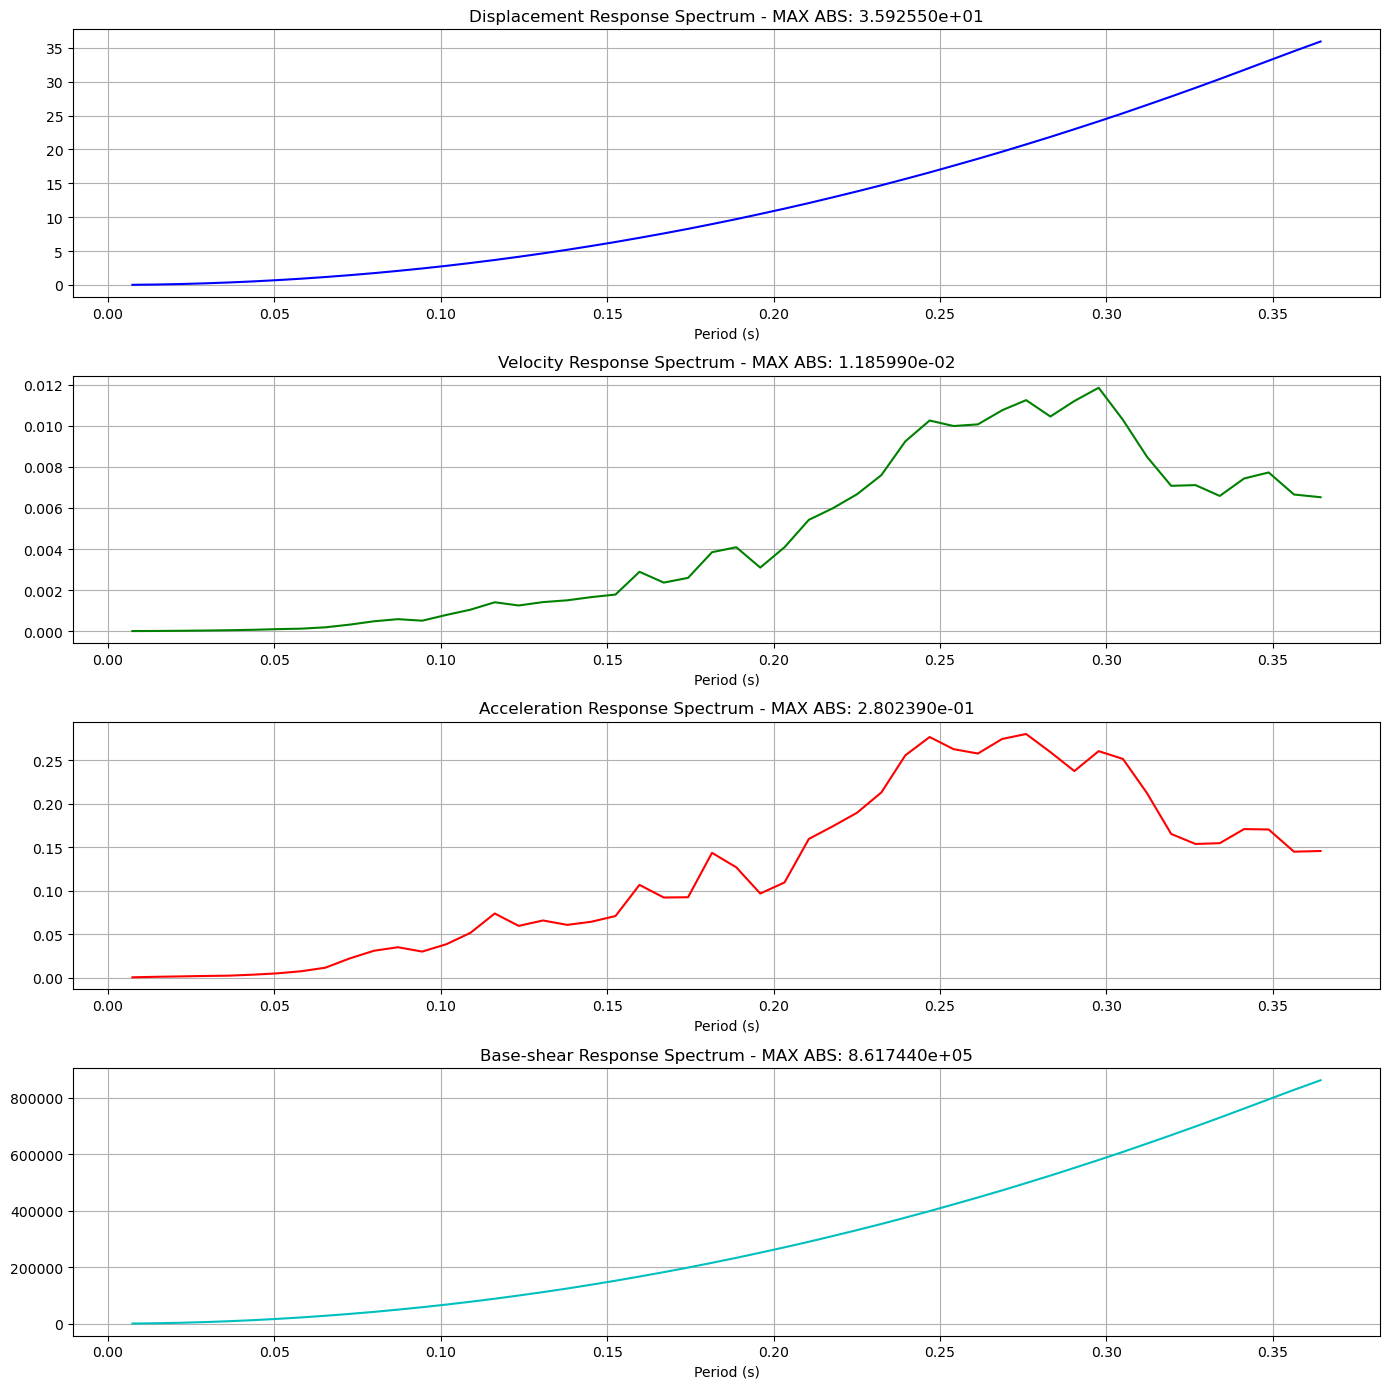

In [45]:
xlabel = 'Period (s)'
y1label = 'Displacement Response Spectrum'
y2label = 'Velocity Response Spectrum'
y3label = 'Acceleration Response Spectrum'
y4label = 'Base-shear Response Spectrum'
PLOT_TIME_HIS(period, xlabel, pgd, y1label, pgv, y2label, pga, y3label, pgb, y4label, Z=4, LOGX=0, LOGY=0)

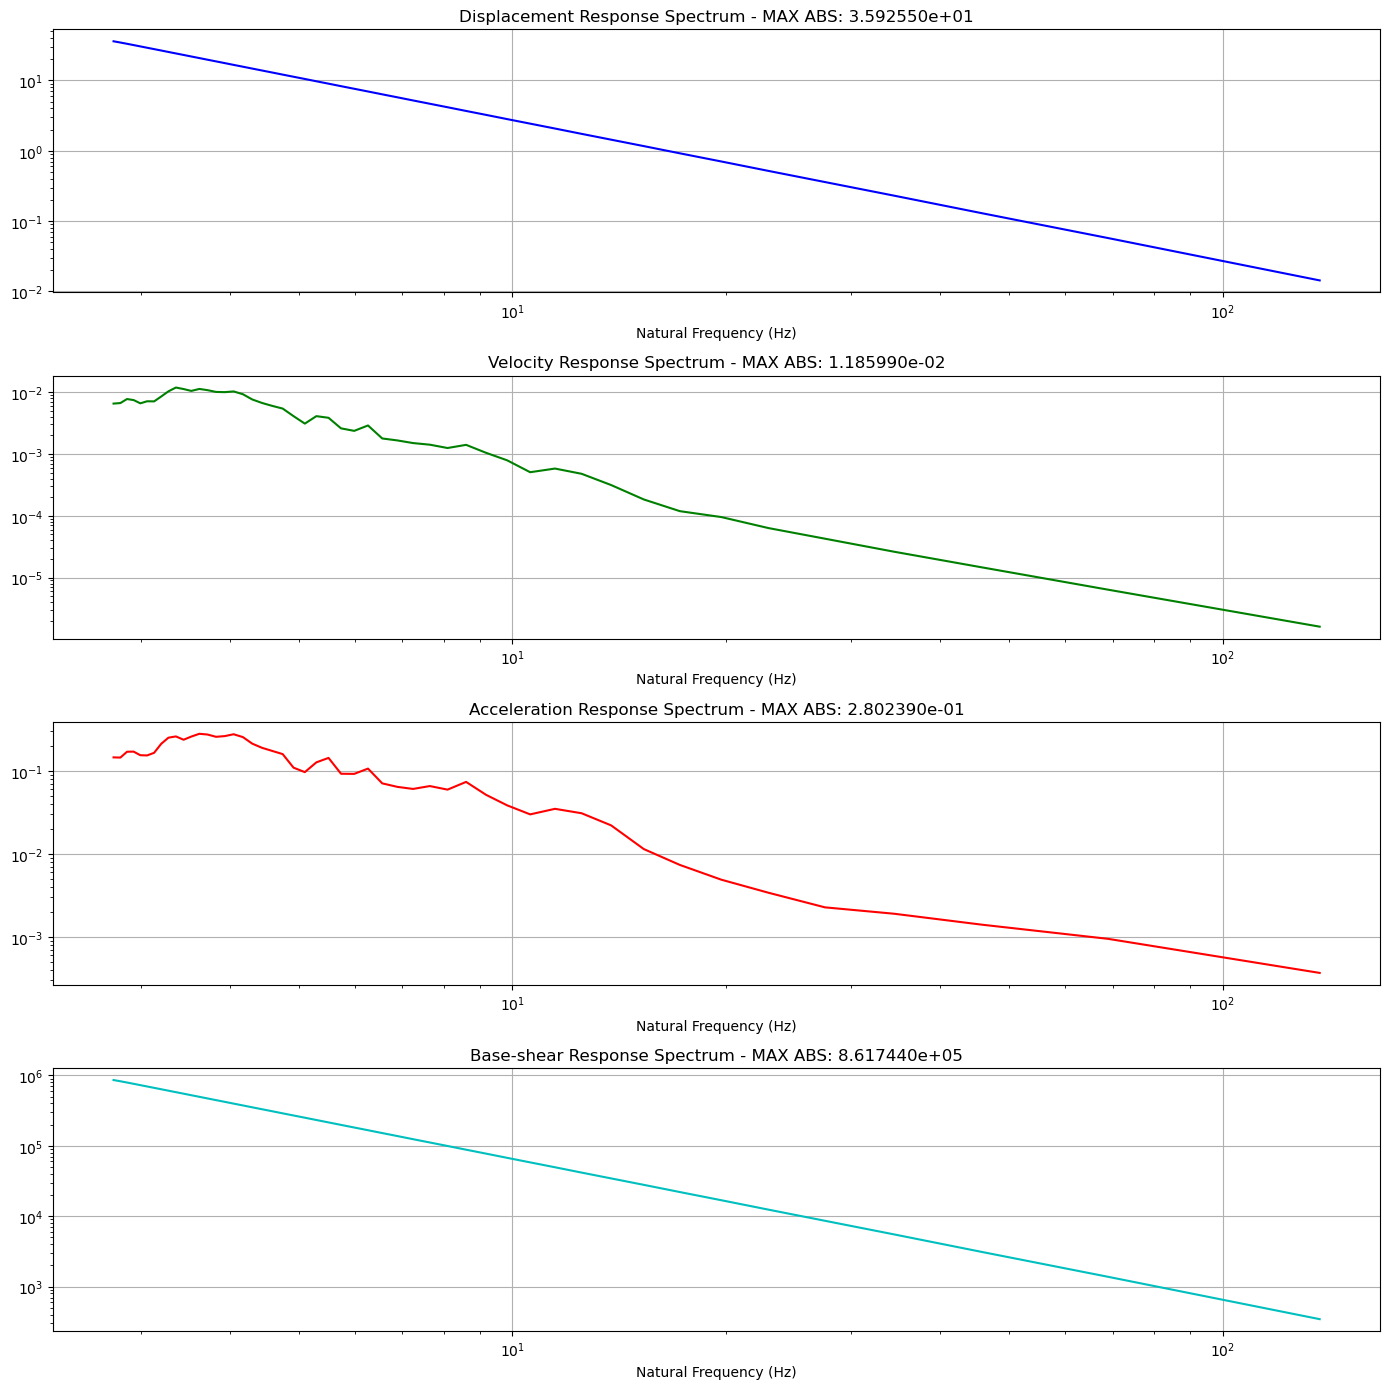

In [46]:
xlabel = 'Natural Frequency (Hz)'
y1label = 'Displacement Response Spectrum'
y2label = 'Velocity Response Spectrum'
y3label = 'Acceleration Response Spectrum'
y4label = 'Base-shear Response Spectrum'
PLOT_TIME_HIS(nf, xlabel, pgd, y1label, pgv, y2label, pga, y3label, pgb, y4label, Z=4, LOGX=1, LOGY=1)

0.8509103561328711


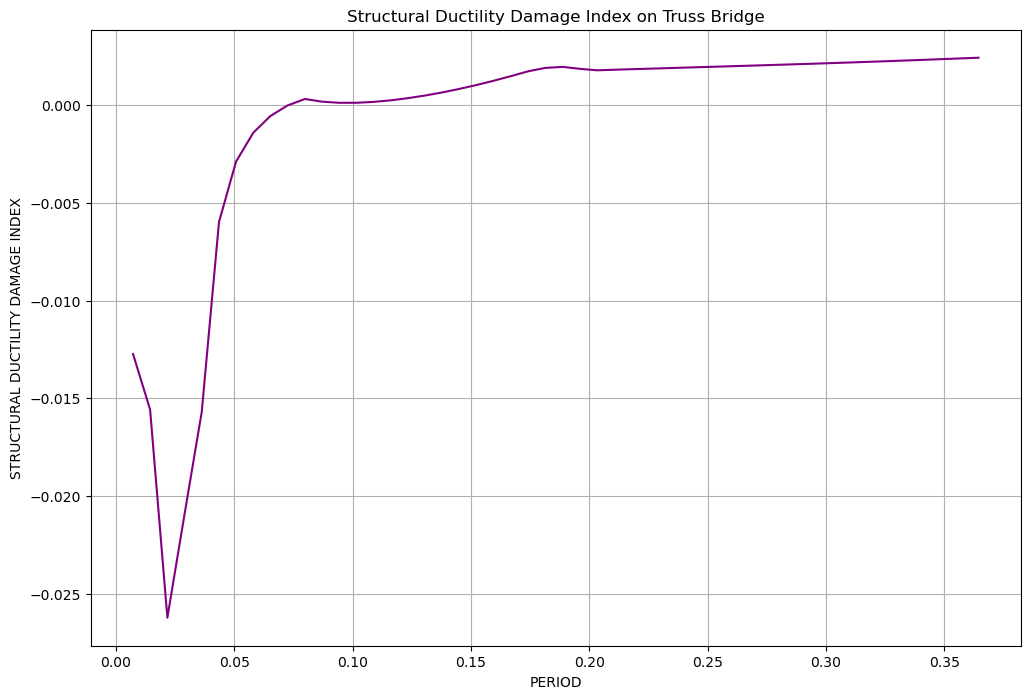

In [47]:
# Data usage
X = period
Y = diS
XLABEL = 'PERIOD'
YLABEL = 'STRUCTURAL DUCTILITY DAMAGE INDEX'
TITLE = 'Structural Ductility Damage Index on Truss Bridge'
LABELS = 'DI'
PLOT_2D(X, Y, _, _, XLABEL, YLABEL, TITLE, COLOR='purple', Z=1)

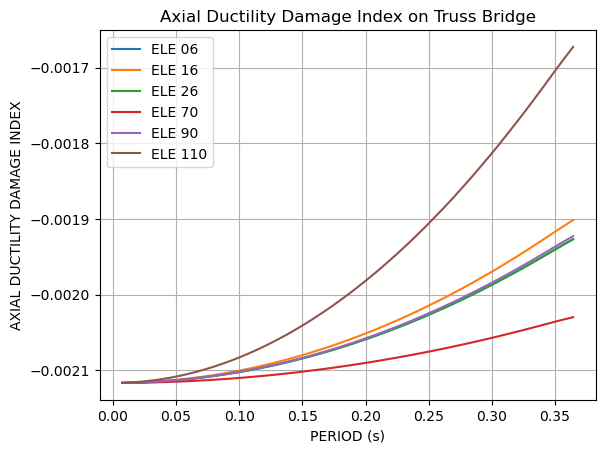

In [48]:
# Data usage
x = period
y_list = [
    diA06,
    diA16,
    diA26,
    diA70, 
    diA90,
    diA110
]

XLABEL = 'PERIOD (s)'
YLABEL = 'AXIAL DUCTILITY DAMAGE INDEX'
TITLE = 'Axial Ductility Damage Index on Truss Bridge'
LABELS = ['ELE 06', 'ELE 16','ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)


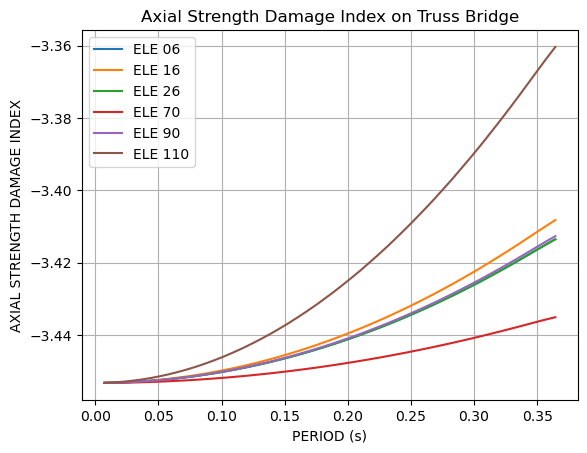

In [49]:
# Data usage
x = period
y_list = [
    diAS06,
    diAS16,
    diAS26,
    diAS70, 
    diAS90,
    diAS110
]

XLABEL = 'PERIOD (s)'
YLABEL = 'AXIAL STRENGTH DAMAGE INDEX'
TITLE = 'Axial Strength Damage Index on Truss Bridge'
LABELS = ['ELE 06', 'ELE 16','ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

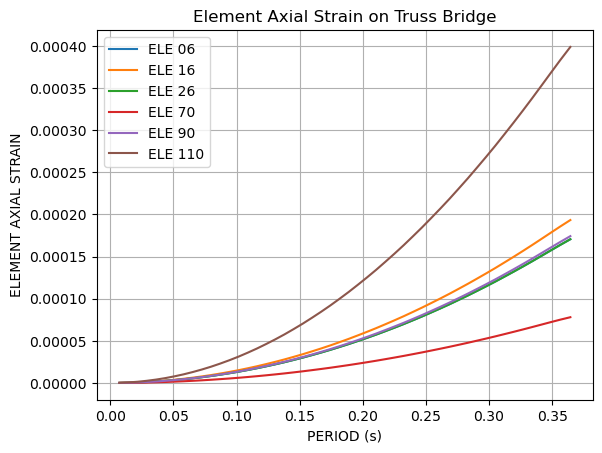

In [50]:
# Data usage
x = period
y_list = [
    Dyn_eleStrain06,
    Dyn_eleStrain16,
    Dyn_eleStrain26,
    Dyn_eleStrain70, 
    Dyn_eleStrain90,
    Dyn_eleStrain110
]

XLABEL = 'PERIOD (s)'
YLABEL = 'ELEMENT AXIAL STRAIN'
TITLE = 'Element Axial Strain on Truss Bridge'
LABELS = ['ELE 06', 'ELE 16','ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)


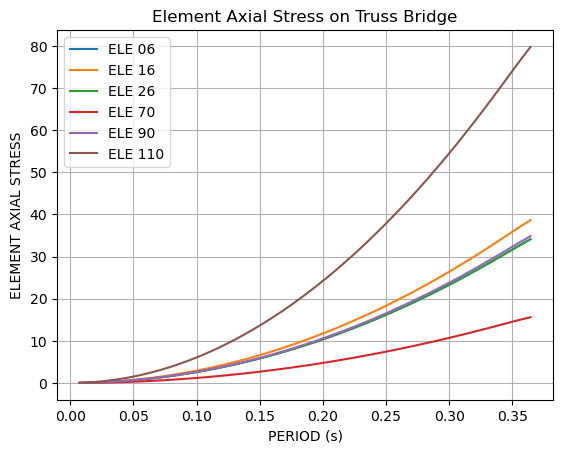

In [51]:
# Data usage
x = period
y_list = [
    Dyn_eleStress06,
    Dyn_eleStress16,
    Dyn_eleStress26,
    Dyn_eleStress70, 
    Dyn_eleStress90,
    Dyn_eleStress110
]

XLABEL = 'PERIOD (s)'
YLABEL = 'ELEMENT AXIAL STRESS'
TITLE = 'Element Axial Stress on Truss Bridge'
LABELS = ['ELE 06', 'ELE 16','ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)


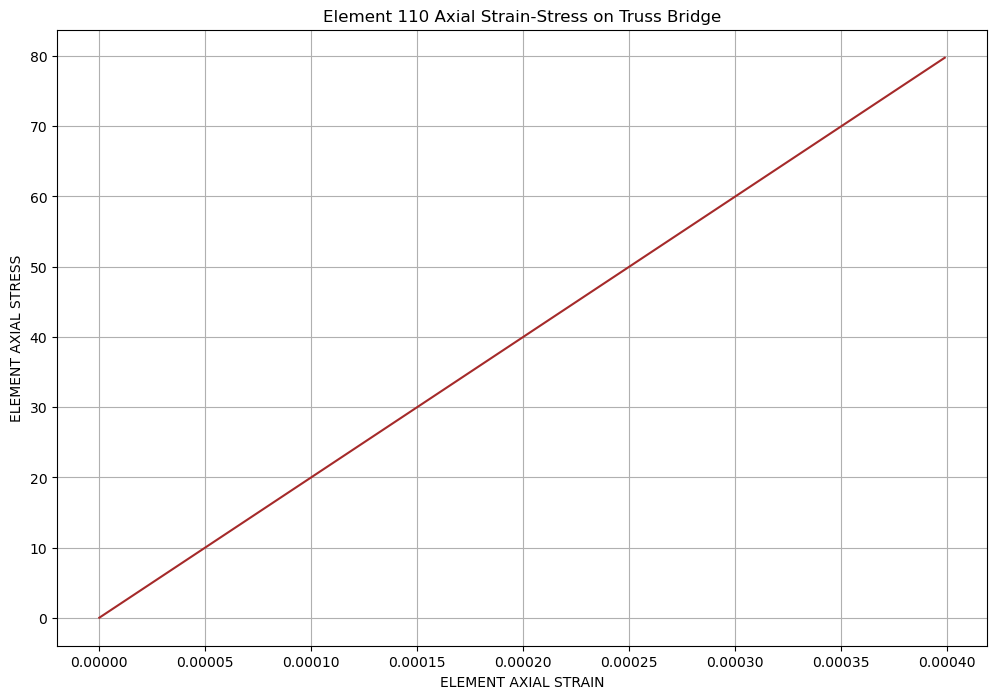

In [52]:
# Data usage
X = Dyn_eleStrain110
Y = Dyn_eleStress110
XLABEL = 'ELEMENT AXIAL STRAIN'
YLABEL = 'ELEMENT AXIAL STRESS'
TITLE = 'Element 110 Axial Strain-Stress on Truss Bridge'
LABELS = 'ELE 110'
PLOT_2D(X, Y, _, _, XLABEL, YLABEL, TITLE, COLOR='brown', Z=1)

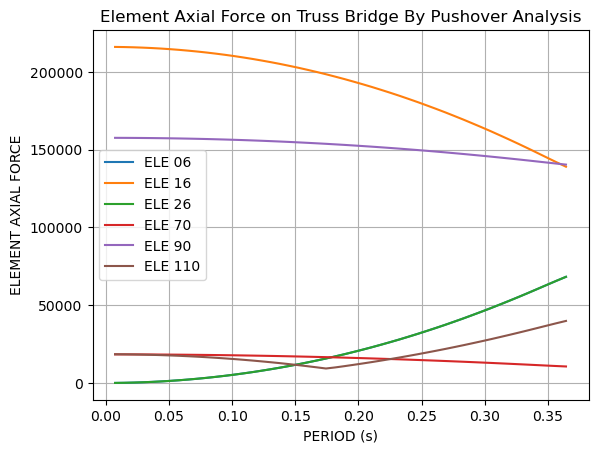

In [53]:
# Data usage
x = period
y_list = [
    Push_eleForce06,
    Push_eleForce16,
    Push_eleForce26,
    Push_eleForce70, 
    Push_eleForce90,
    Push_eleForce110
]

XLABEL = 'PERIOD (s)'
YLABEL = 'ELEMENT AXIAL FORCE'
TITLE = 'Element Axial Force on Truss Bridge By Pushover Analysis'
LABELS = ['ELE 06', 'ELE 16','ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

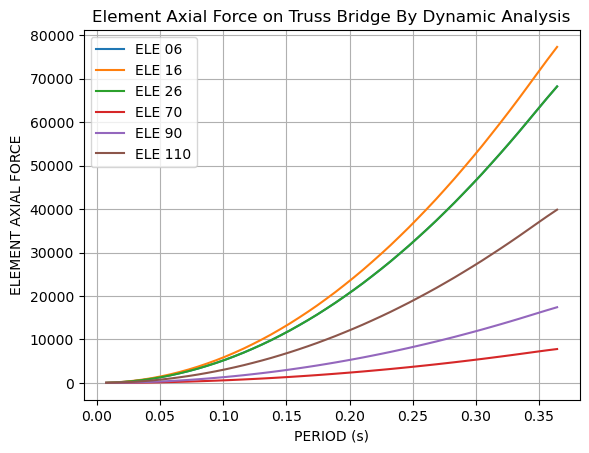

In [54]:
# Data usage
x = period
y_list = [
    Dyn_eleForce06,
    Dyn_eleForce16,
    Dyn_eleForce26,
    Dyn_eleForce70, 
    Dyn_eleForce90,
    Dyn_eleForce110
]

XLABEL = 'PERIOD (s)'
YLABEL = 'ELEMENT AXIAL FORCE'
TITLE = 'Element Axial Force on Truss Bridge By Dynamic Analysis'
LABELS = ['ELE 06', 'ELE 16','ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

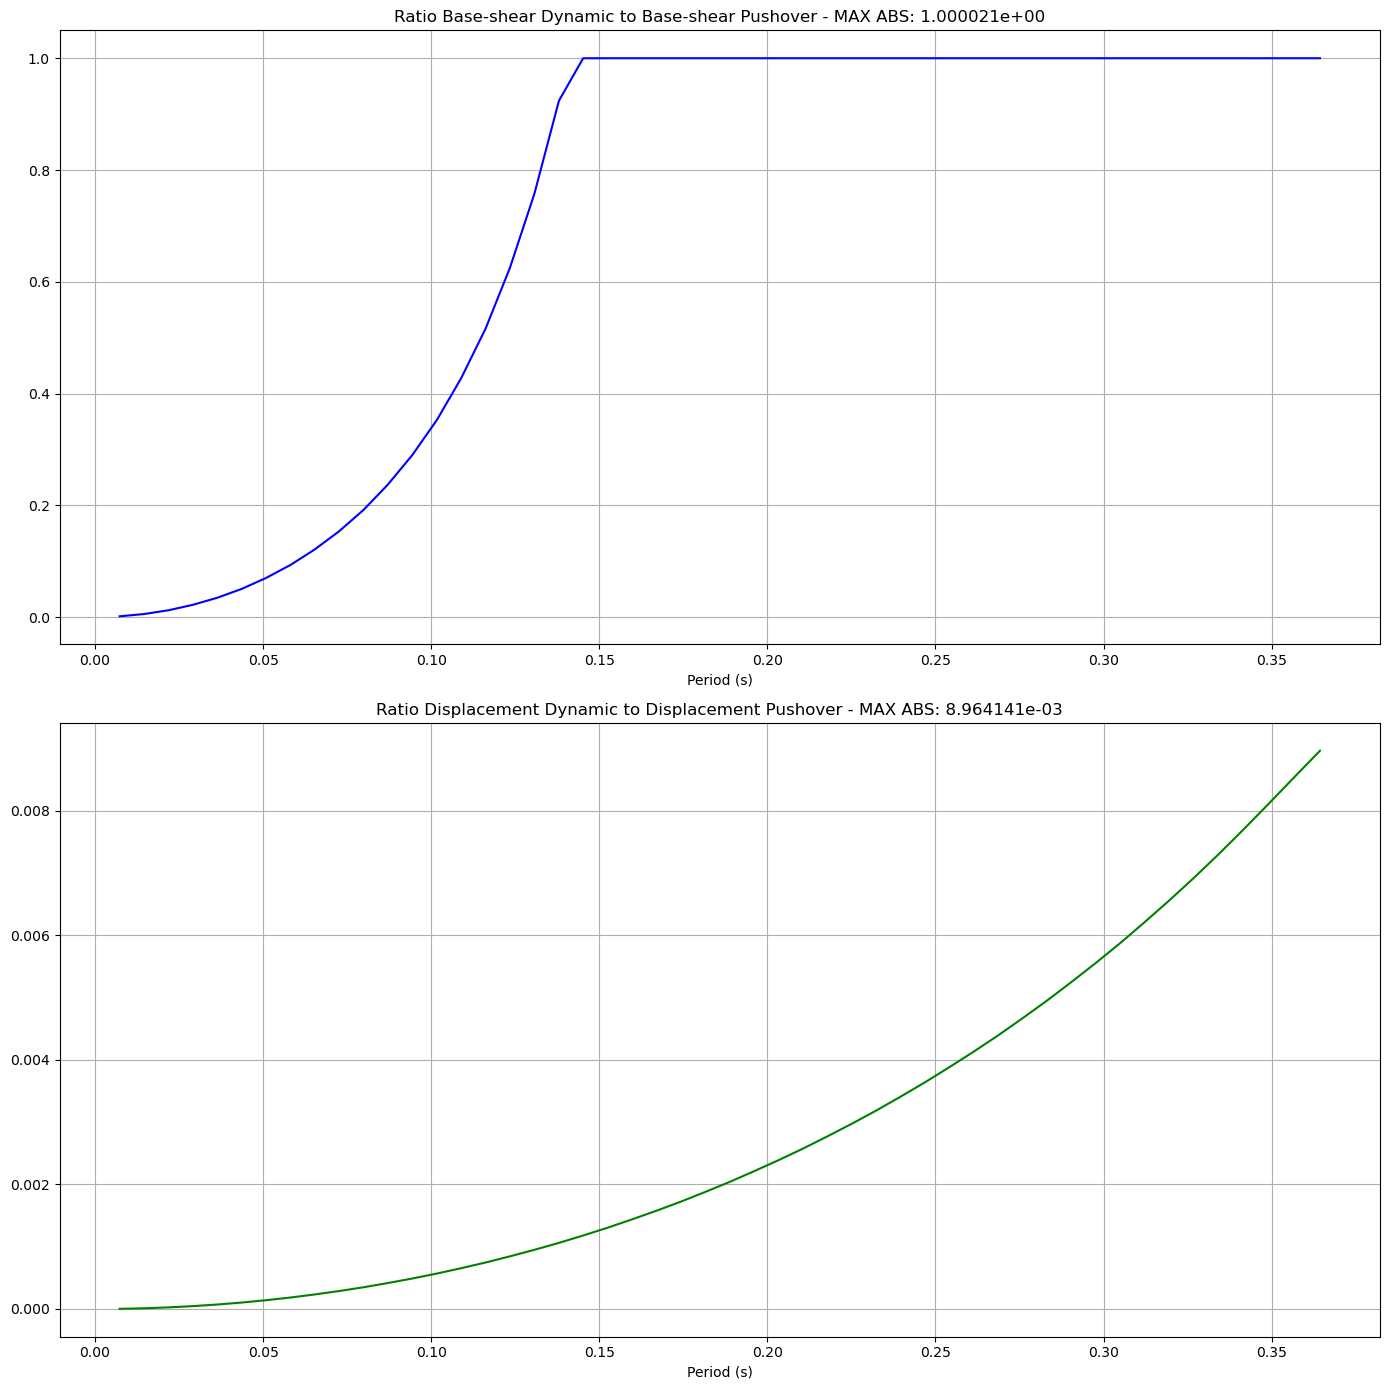

In [55]:
xlabel = 'Period (s)'
y1label = 'Ratio Base-shear Dynamic to Base-shear Pushover'
y2label = 'Ratio Displacement Dynamic to Displacement Pushover'
PLOT_TIME_HIS(period, xlabel, bDbP, y1label, dDdP, y2label, _, _, _, _, Z = 2, LOGX = 0, LOGY = 0)

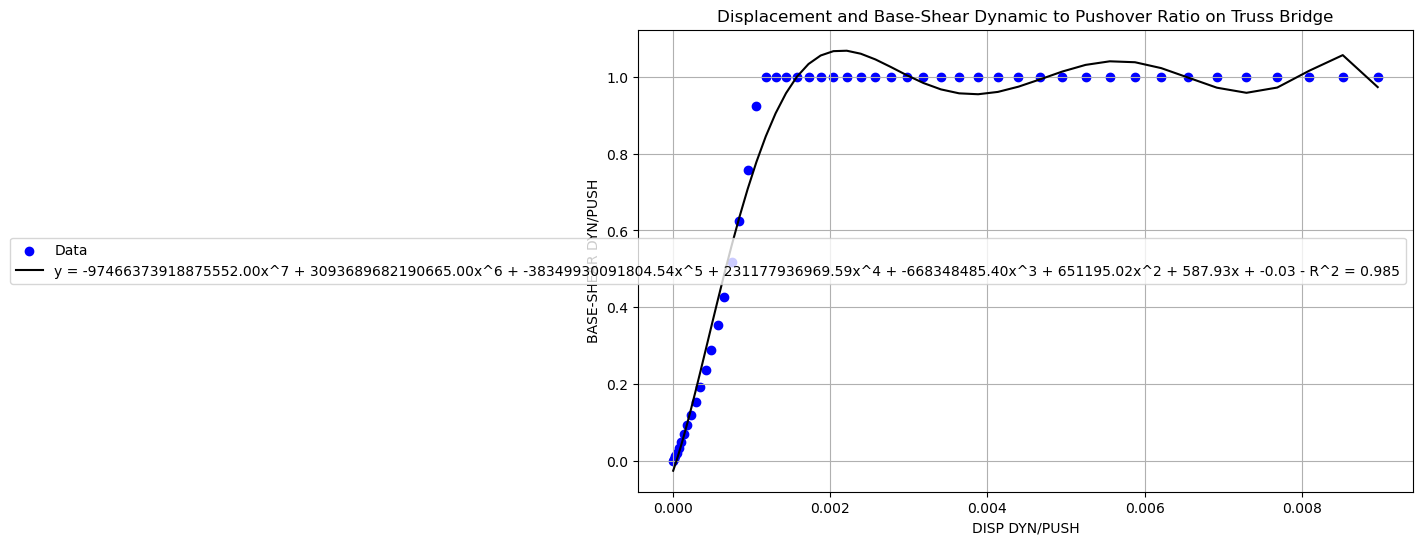

In [56]:
# Data usage
X = dDdP
Y = bDbP
XLABEL = 'DISP DYN/PUSH'
YLABEL = 'BASE-SHEAR DYN/PUSH'
TITLE = 'Displacement and Base-Shear Dynamic to Pushover Ratio on Truss Bridge'
COLOR = 'BLUE'
PLOT_SCATTER(X, Y, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)

In [ ]:
HISROGRAM_BOXPLOT(pgd, HISTO_COLOR='blue', LABEL='Displacement Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pgv, HISTO_COLOR='purple', LABEL='Velocity Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pga, HISTO_COLOR='green', LABEL='Acceleration Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(pgb, HISTO_COLOR='orange', LABEL='Base-shear Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(diS, HISTO_COLOR='lime', LABEL='Structure Ductility Damage Index Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(diA06, HISTO_COLOR='pink', LABEL='Axial Ductility Damage Index Response Spectrum Element 6')

In [ ]:
HISROGRAM_BOXPLOT(diA16, HISTO_COLOR='cyan', LABEL='Axial Ductility Damage Index Response Spectrum Element 16')

In [ ]:
HISROGRAM_BOXPLOT(diA26, HISTO_COLOR='yellow', LABEL='Axial Ductility Damage Index Response Spectrum Element 26')

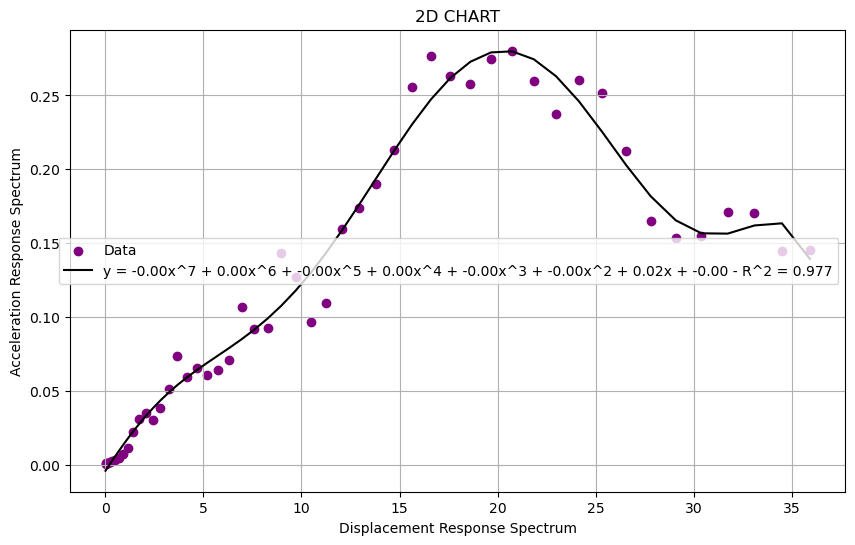

In [43]:
XLABEL = 'Displacement Response Spectrum'
YLABEL = 'Acceleration Response Spectrum'
TITLE = '2D CHART'
COLOR = 'purple'
PLOT_SCATTER(pgd, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
PLOT_SCATTER_PLOTLY(pgd, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#plot_scatter_plotly(pgd, pga, XLABEL, YLABEL, TITLE, COLOR)

In [57]:
XLABEL = 'Displacement Response Spectrum'
YLABEL = 'Velocity Response Spectrum'
ZLABEL = 'Acceleration Response Spectrum'
TITLE = '3D CHART'
PLOT3D(pgd, pgv, pga, XLABEL, YLABEL, ZLABEL, TITLE)

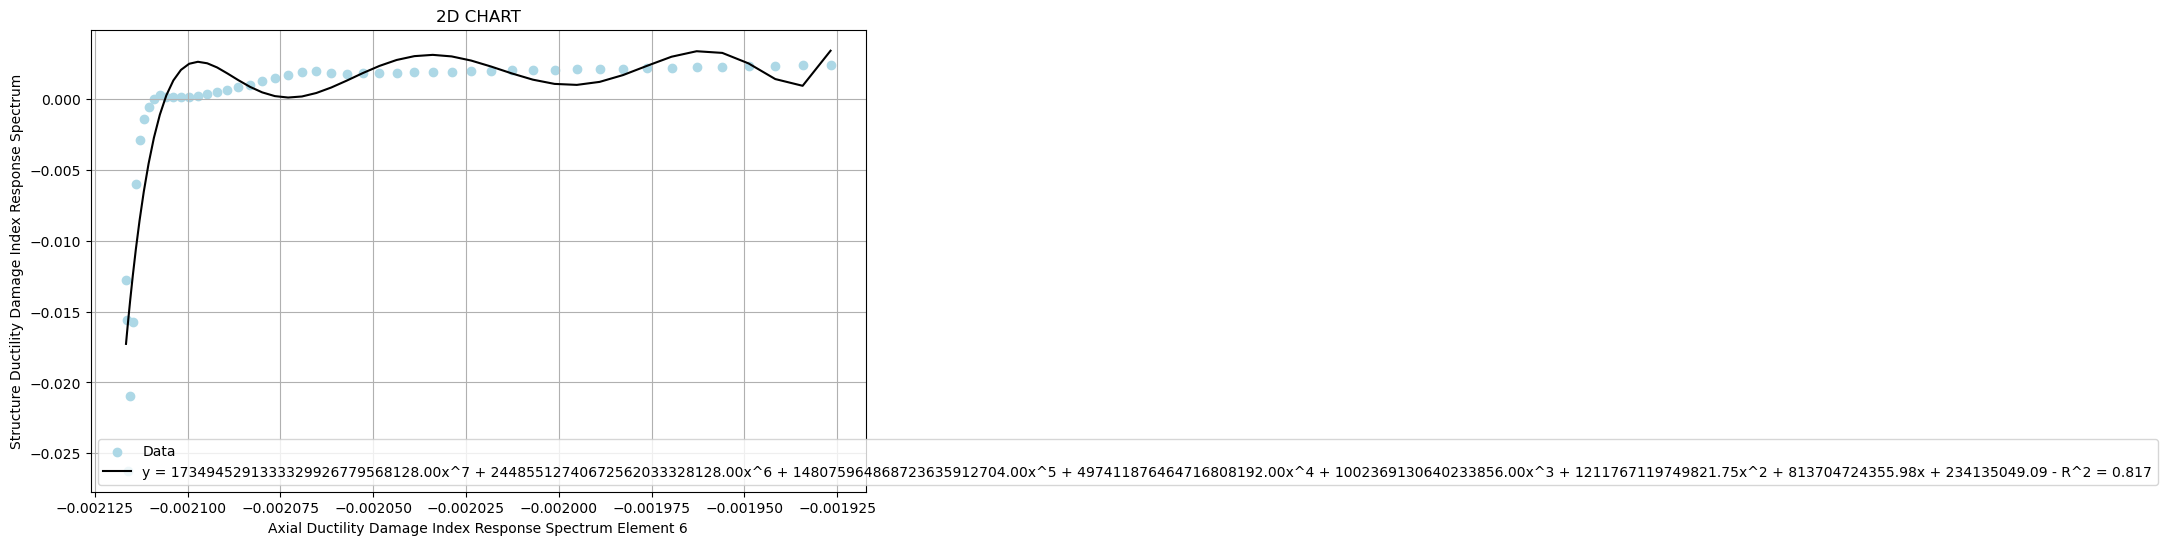

In [58]:
XLABEL = 'Axial Ductility Damage Index Response Spectrum Element 6'
YLABEL ='Structure Ductility Damage Index Response Spectrum'
TITLE = '2D CHART'
COLOR = 'lightblue'
PLOT_SCATTER(diA06, diS, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#plot_scatter_plotly(diA06, diS, XLABEL, YLABEL, TITLE, COLOR)

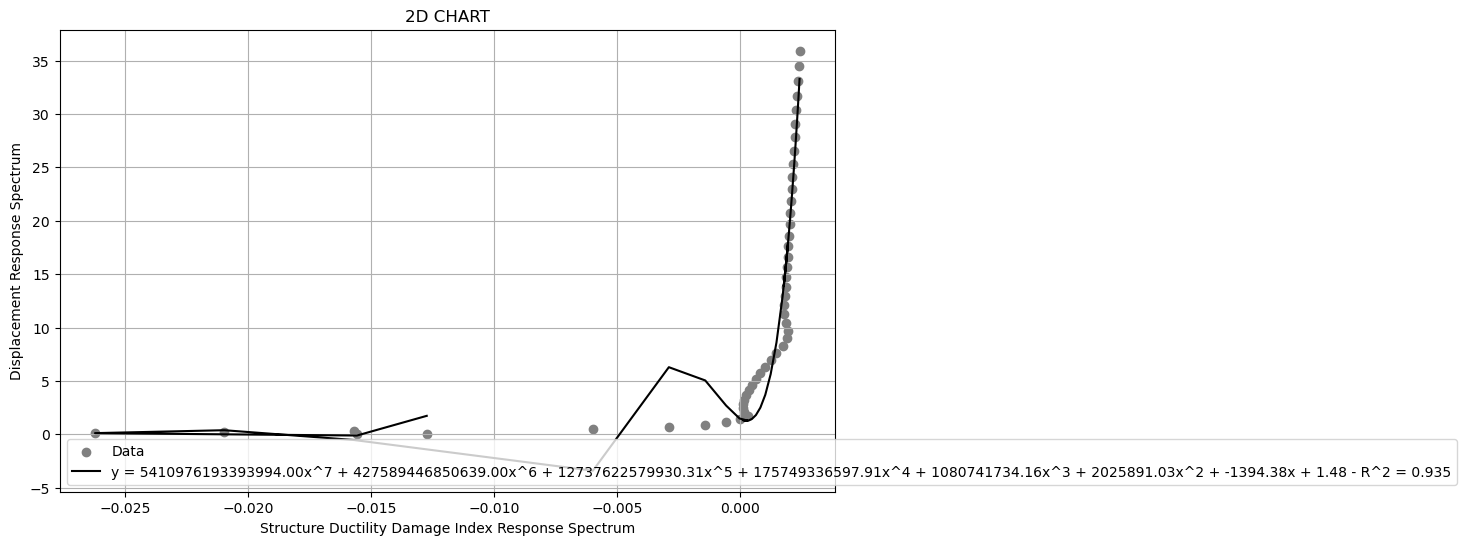

In [59]:
XLABEL = 'Structure Ductility Damage Index Response Spectrum'
YLABEL = 'Displacement Response Spectrum'
TITLE = '2D CHART'
COLOR = 'gray'
PLOT_SCATTER(diS, pgd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
PLOT_SCATTER_PLOTLY(diS, pgd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)
#plot_scatter_plotly(diS, pgd, XLABEL, YLABEL, TITLE, COLOR)

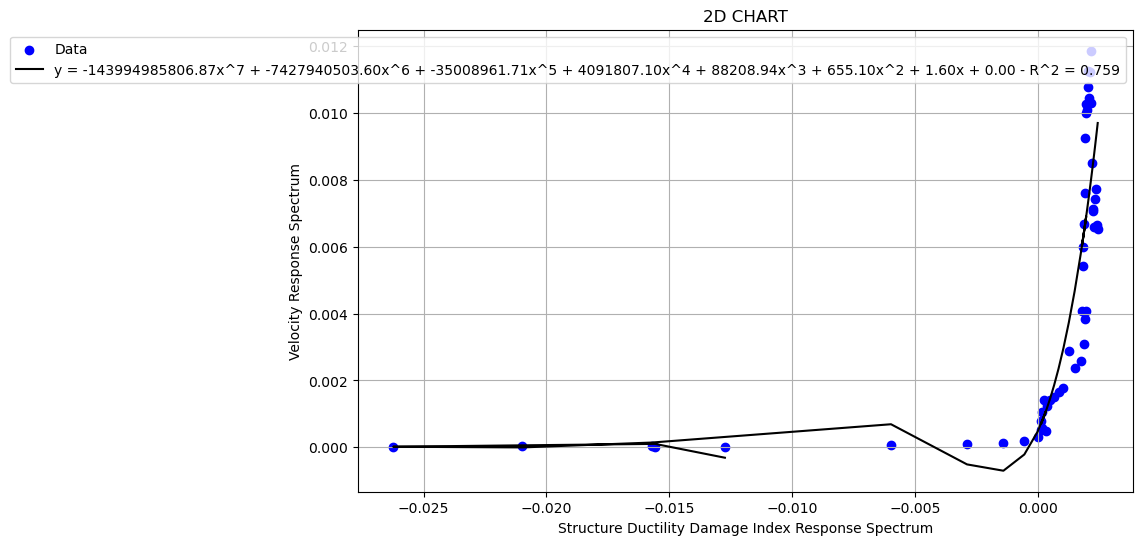

In [60]:
XLABEL = 'Structure Ductility Damage Index Response Spectrum'
YLABEL = 'Velocity Response Spectrum'
TITLE = '2D CHART'
COLOR = 'blue'
PLOT_SCATTER(diS, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
PLOT_SCATTER_PLOTLY(diS, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)
#plot_scatter_plotly(diS, pgv, XLABEL, YLABEL, TITLE, COLOR)

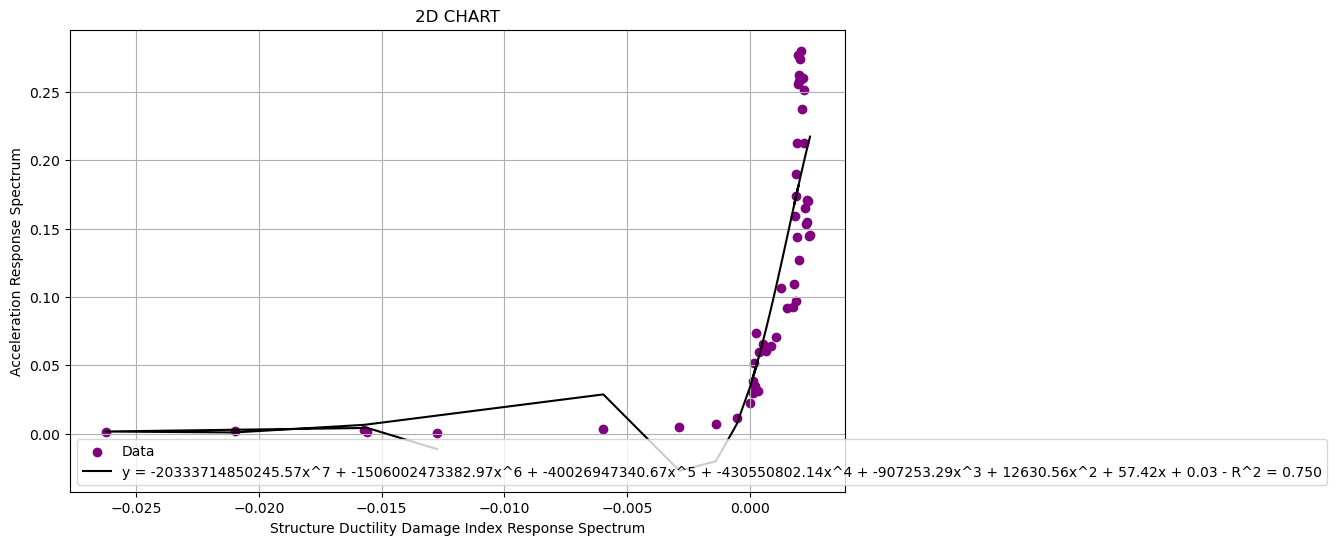

In [61]:
XLABEL = 'Structure Ductility Damage Index Response Spectrum'
YLABEL = 'Acceleration Response Spectrum'
TITLE = '2D CHART'
COLOR = 'purple'
PLOT_SCATTER(diS, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
PLOT_SCATTER_PLOTLY(diS, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7)
#plot_scatter_plotly(diS, pga, XLABEL, YLABEL, TITLE, COLOR)

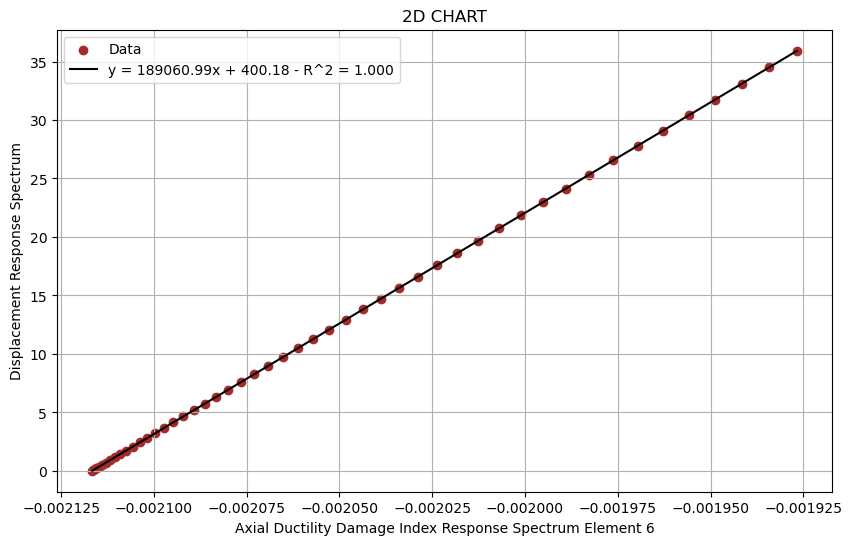

In [62]:
XLABEL = 'Axial Ductility Damage Index Response Spectrum Element 6'
YLABEL = 'Displacement Response Spectrum'
TITLE = '2D CHART'
COLOR = 'brown'
PLOT_SCATTER(diA06, pgd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 1) 
PLOT_SCATTER_PLOTLY(diA06, pgd, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 1) 
#plot_scatter_plotly(diA06, pgd, XLABEL, YLABEL, TITLE, COLOR)

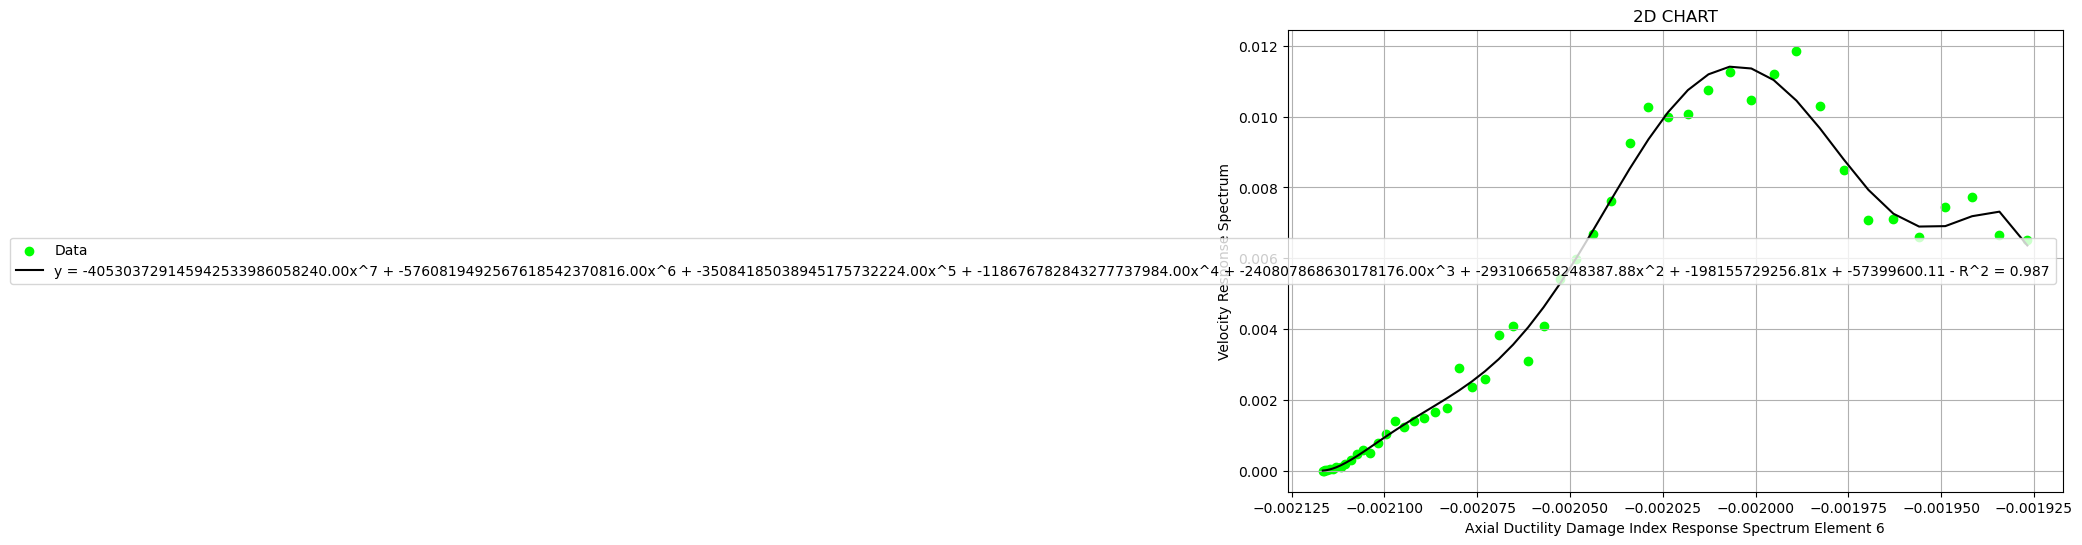

In [63]:
XLABEL = 'Axial Ductility Damage Index Response Spectrum Element 6'
YLABEL = 'Velocity Response Spectrum'
TITLE = '2D CHART'
COLOR = 'lime'
PLOT_SCATTER(diA06, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
PLOT_SCATTER_PLOTLY(diA06, pgv, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#plot_scatter_plotly(diA06, pgv, XLABEL, YLABEL, TITLE, COLOR)

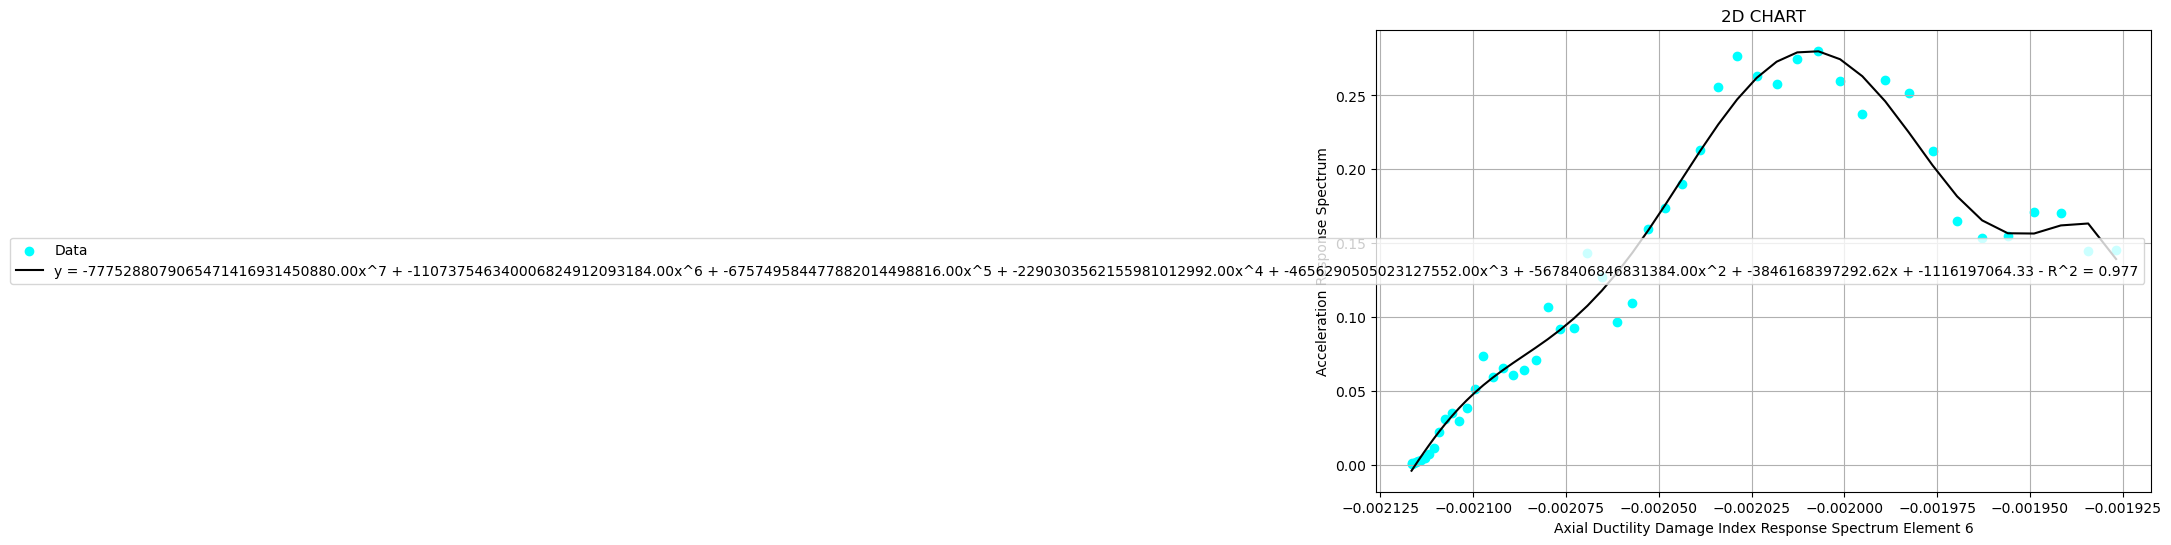

In [64]:
XLABEL = 'Axial Ductility Damage Index Response Spectrum Element 6'
YLABEL = 'Acceleration Response Spectrum'
TITLE = '2D CHART'
COLOR = 'cyan'
PLOT_SCATTER(diA06, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
PLOT_SCATTER_PLOTLY(diA06, pga, XLABEL, YLABEL, TITLE, COLOR, LOG = 0, ORDER = 7) 
#plot_scatter_plotly(diA06, pga, XLABEL, YLABEL, TITLE, COLOR)

In [65]:
XLABEL = 'Axial Ductility Damage Index Response Spectrum Element 6'
YLABEL ='Structure Ductility Damage Index Response Spectrum'
ZLABEL ='Displacement Response Spectrum'
TITLE = '3D CHART'
PLOT3D(diA06, diS, pgd, XLABEL, YLABEL, ZLABEL, TITLE)

In [66]:
### LAST LOAD DATA
import numpy as np
## PYSHOVER ANALYSIS DATA
# Displacement Time History
DTHP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2)
# Base Shear Time History 01
BTH01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2)
# Base Shear Time History 11
BTH011 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_11', 2, i, 2)
# Base Shear Time History 21
BTH021 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_21', 2, i, 2)
# Base Shear Time History 31
BTH031 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_31', 2, i, 2)
BTHP = abs(BTH01 + BTH011 + BTH021 + BTH031)

print(len(DTHP), len(BTHP))

## DYNAMAIC ANALYSIS DATA
# Displacement Time History
DTHD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, i, 2)
# Velocity Time History
VTH = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'VTH_DYN', 2, i, 2)
# Acceleration Time History
ATH = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'ATH_DYN', 2, i, 2)
# Base Shear Time History 01
BTH01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_01', 2, i, 2)
# Base Shear Time History 11
BTH011 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_11', 2, i, 2)
# Base Shear Time History 21
BTH021 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_21', 2, i, 2)
# Base Shear Time History 31
BTH031 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_DYN_31', 2, i, 2)
# Total Base Shear
BTHD = BTH01 + BTH011 + BTH021 + BTH031

print(len(DTHD), len(VTH),len(ATH),len(BTHD))


1009 1009
1010 1010 1010 1010


1009
25026.34770791016


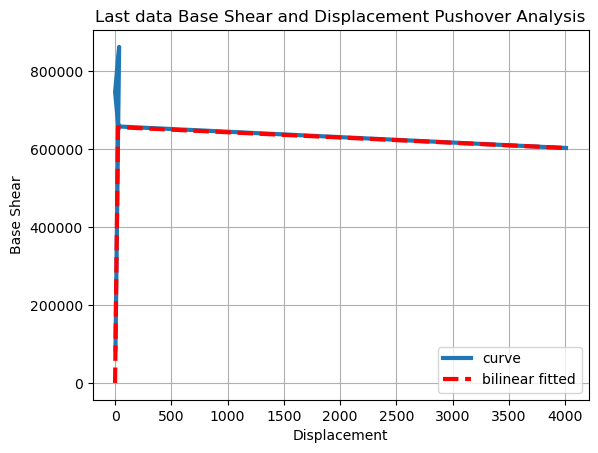

			 Structure Ductility Damage Index: 0.002


In [67]:
print(len(BTHP))
xx, yy, _, _, _, _, _ = BILNEAR_CURVE(abs(DTHP), abs(BTHP), 30)
print(yy[1]/ xx[1])
#demand_disp = MAXABS_FUN(DATA_FILE01, 1, i)# DEMAND DYNAMIC DISPLACEMENT
XLABEL = 'Displacement'
YLABEL = 'Base Shear'
TITLE = 'Last data Base Shear and Displacement Pushover Analysis'
COLOR = 'black'
PLOT_2D(abs(DTHP), abs(BTHP), xx, yy, XLABEL, YLABEL, TITLE, COLOR='black', Z=2) 
DIs = (demand_disp - xx[1]) / (xx[2] - xx[1])
print(f'\t\t\t Structure Ductility Damage Index: {DIs:.3f}')

1010


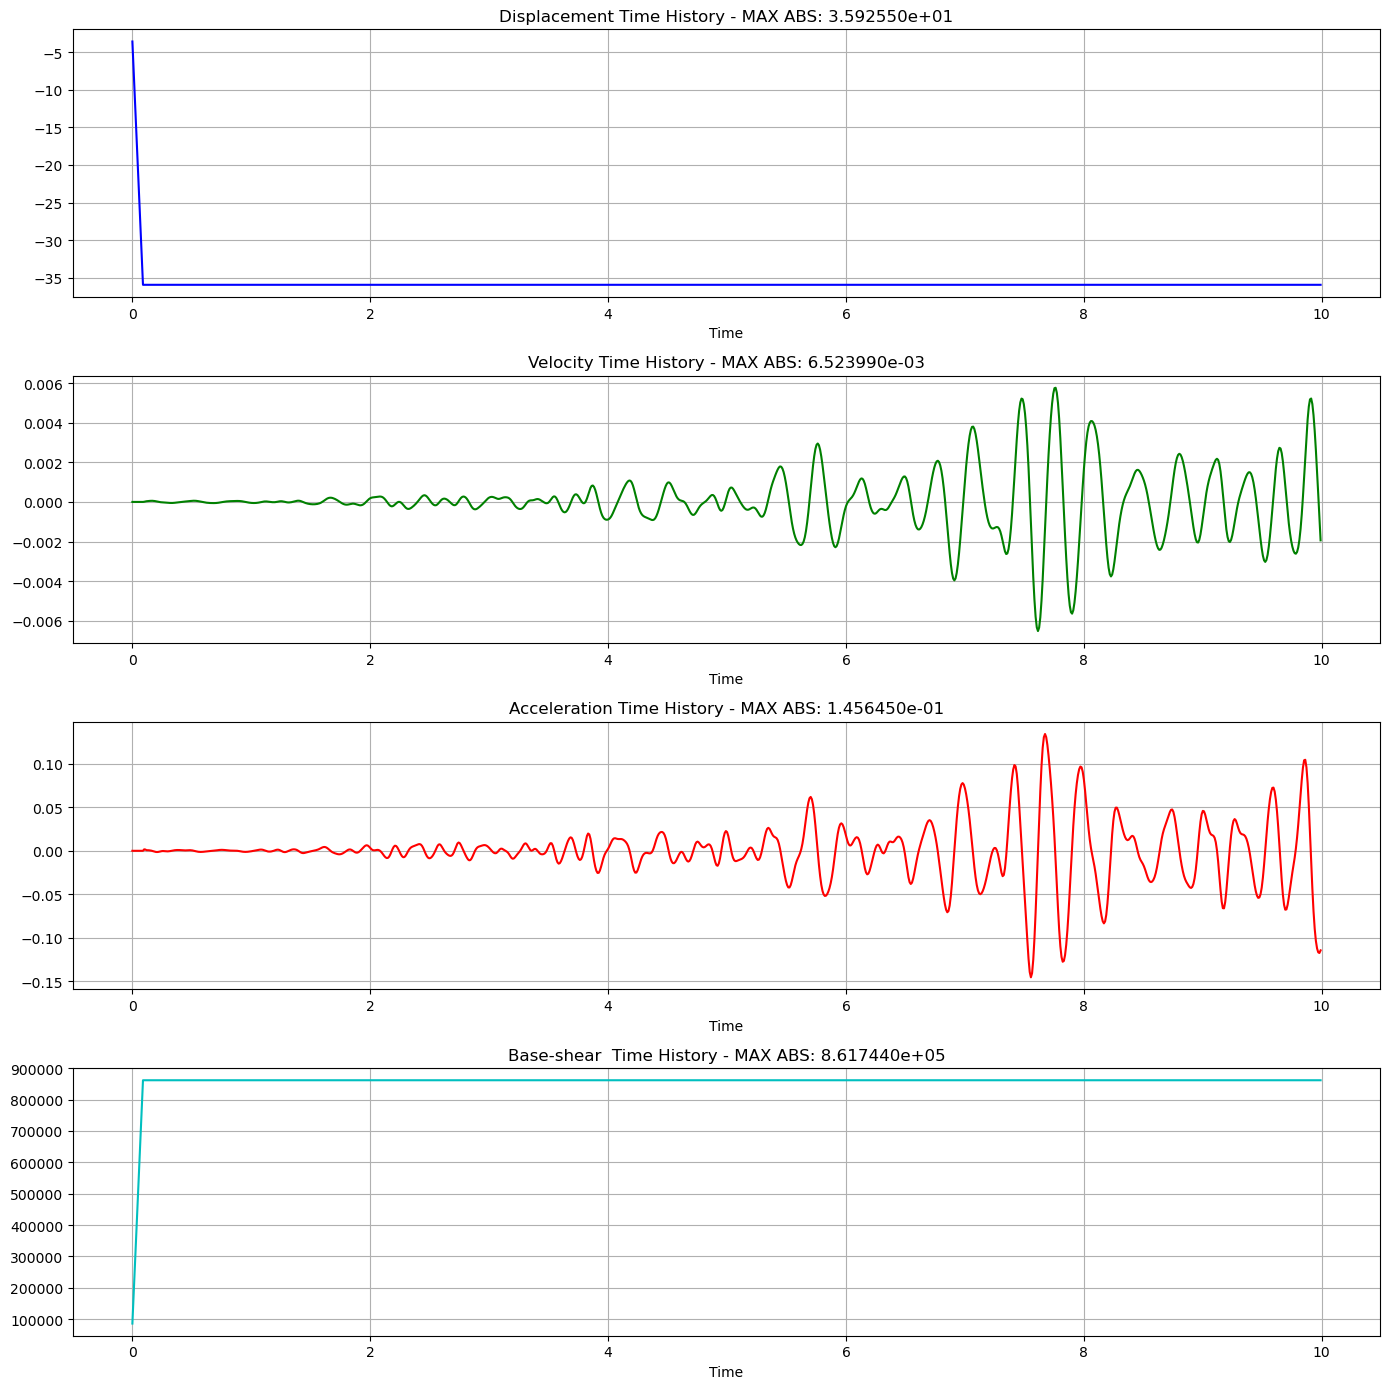

In [68]:
xlabel = 'Time'
y1label = 'Displacement Time History'
y2label = 'Velocity Time History'
y3label = 'Acceleration Time History'
y4label = 'Base-shear  Time History'
MAX_TIME = 10 # DATA MUST BE GOTTEN FROM GROUND MOTION TIME HISTORY
DT  = MAX_TIME / len(DTHD)
TIME = np.arange(0, MAX_TIME , DT)
print(len(TIME))
PLOT_TIME_HIS(TIME, xlabel, DTHD, y1label, VTH, y2label, ATH, y3label, BTHD, y4label, Z = 4, LOGX = 0, LOGY = 0)

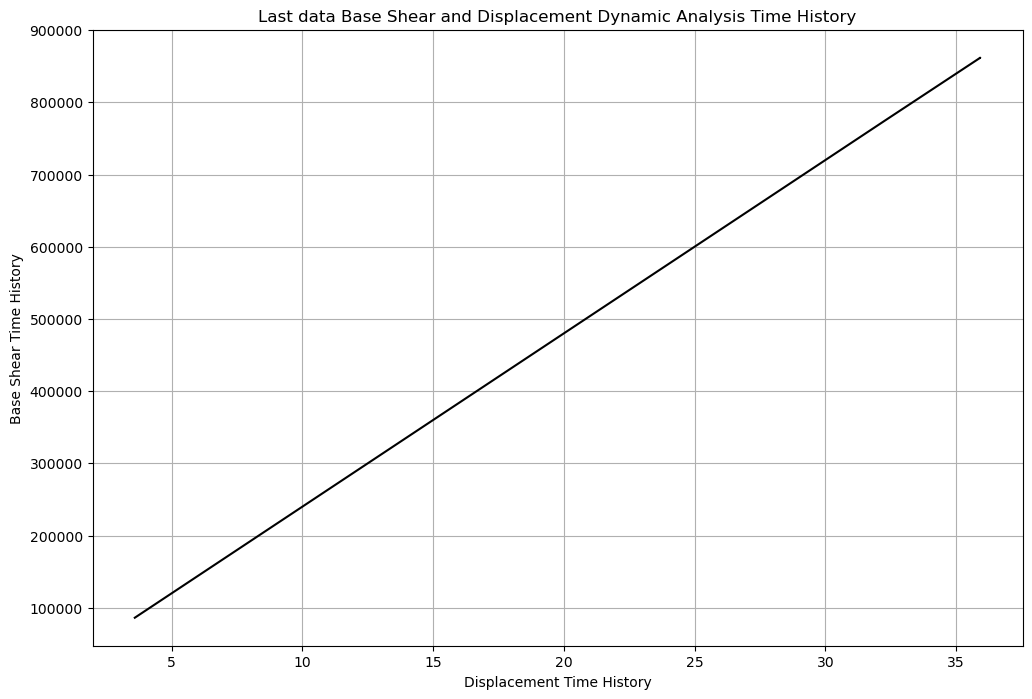

In [69]:
XLABEL = 'Displacement Time History'
YLABEL = 'Base Shear Time History'
TITLE = 'Last data Base Shear and Displacement Dynamic Analysis Time History'
COLOR = 'black'
PLOT_2D(abs(DTHD), abs(BTHD),_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

In [70]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({'Displacement Response Spectrum': pgd,
                   'Velocity Response Spectrum': pgv,
                   'Acceleration Response Spectrum': pga,
                   'Base-shear Response Spectrum': pgb,
                   'Structure Ductility Damage Index Response Spectrum': diS,
                   'Axial Ductility Damage Index Response Spectrum element 6':diA06,
                   'Axial Ductility Damage Index Response Spectrum element 16':diA16})
print(df)
# PLOT HEATMAP FOR CORRELATION 
PLOT_HEATMAP(df) 

    Displacement Response Spectrum  Velocity Response Spectrum  \
0                         0.014362                    0.000002   
1                         0.057446                    0.000006   
2                         0.129254                    0.000015   
3                         0.229785                    0.000026   
4                         0.359040                    0.000043   
5                         0.517017                    0.000063   
6                         0.703718                    0.000095   
7                         0.919142                    0.000119   
8                         1.163290                    0.000184   
9                         1.436160                    0.000314   
10                        1.737750                    0.000478   
11                        2.068070                    0.000581   
12                        2.427110                    0.000507   
13                        2.814880                    0.000789   
14        

In [71]:
### Multiple Regression Model
def Multiple_Regression(df):
    import statsmodels.api as sm
    # Add a constant term for the intercept
    X = sm.add_constant(df[['Displacement Response Spectrum',
                            'Velocity Response Spectrum',
                            'Acceleration Response Spectrum',
                            'Base-shear Response Spectrum',
                            'Axial Ductility Damage Index Response Spectrum element 6',
                            'Axial Ductility Damage Index Response Spectrum element 16']])

    # Fit the multiple regression model
    model = sm.OLS(df['Structure Ductility Damage Index Response Spectrum'], X).fit()

    # Print the summary
    print(model.summary())

Multiple_Regression(df)   

                                            OLS Regression Results                                            
Dep. Variable:     Structure Ductility Damage Index Response Spectrum   R-squared:                       0.504
Model:                                                            OLS   Adj. R-squared:                  0.460
Method:                                                 Least Squares   F-statistic:                     11.42
Date:                                                Tue, 13 Aug 2024   Prob (F-statistic):           1.76e-06
Time:                                                        13:36:32   Log-Likelihood:                 200.76
No. Observations:                                                  50   AIC:                            -391.5
Df Residuals:                                                      45   BIC:                            -382.0
Df Model:                                                           4                                         
C

In [ ]:
x = diA06 # Axial Ductility Damage Index Response Spectrum element 6
y = diS # Structure Ductility Damage Index Response Spectrum
predicted_y = PREDICT_LSTM(x, y, look_back = 20, ITERATION = 100)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='+', label='DDI')
plt.scatter(-0.05, predicted_y, color='red', marker='o', label='Predicted next DDI')
plt.title(f'MACHINE LEARNING: LONG SHORT-TREM MEMERY (LSTM) METHOD - Predicted {predicted_y}')
plt.xlabel('Axial Ductility Damage Index Response Spectrum element 6')
plt.ylabel('Structure Ductility Damage Index Response Spectrum')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = diA16 # Axial Ductility Damage Index Response Spectrum element 16
y = diS # Structure Ductility Damage Index Response Spectrum
predicted_y = PREDICT_LSTM(x, y, look_back = 20, ITERATION = 100)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='+', label='DDI')
plt.scatter(-0.05, predicted_y, color='red', marker='o', label='Predicted next DDI')
plt.title(f'MACHINE LEARNING: LONG SHORT-TREM MEMERY (LSTM) METHOD - Predicted {predicted_y}')
plt.xlabel('Axial Ductility Damage Index Response Spectrum element 16')
plt.ylabel('Structure Ductility Damage Index Response Spectrum')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = diS  # Structure Ductility Damage Index Response Spectrum
y = pgd  # Displacement Response Spectrum
predicted_y = PREDICT_LSTM(x, y, look_back = 50, ITERATION = 100)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='+', label='DDI')
plt.scatter(-0.044, predicted_y, color='red', marker='o', label='Predicted next DDI')
plt.title(f'MACHINE LEARNING: LONG SHORT-TREM MEMERY (LSTM) METHOD - Predicted {predicted_y}')
plt.xlabel('Structure Ductility Damage Index Response Spectrum')
plt.ylabel('Displacement Response Spectrum')
plt.legend()
plt.grid()
plt.show()

# STRUCTURAL RELIABILITY ANALYSIS #################

Mean Applied Axial Load: 26555.1745
Std Applied Axial Load: 23482.0987
Mean Resistance Axial Load: 7648680.0000
Std Resistance Axial Load: 0.0000
Reliability index (beta): 324.5930
Failure probability (P_f): 0.00 ٪


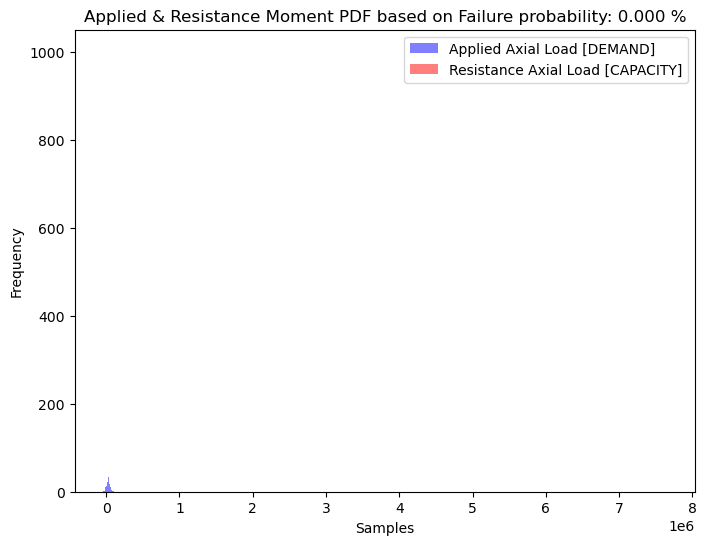

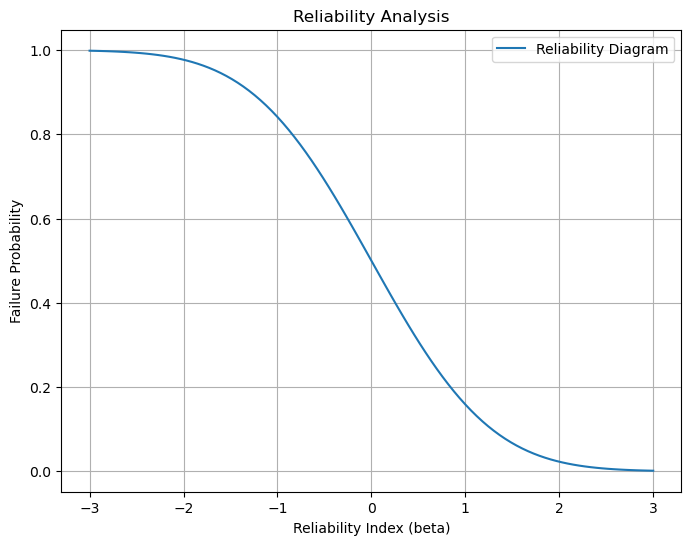

In [72]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Given data (mean and standard deviation)
mean_applied_axial_load = np.mean(np.abs(axialL))  # Mean Applied Axial Load [DEMAND]
std_applied_axial_load = np.std(axialL)    # Std Applied Axial Load  [DEMAND]
mean_resistance_axial_load = np.mean(AXIALr) # Mean Resistance Axial Load [CAPACITY]
std_resistance_axial_load = np.std(AXIALr) # Mean Resistance Axial Load [CAPACITY]

# Calculate reliability index (beta)
g_mean = mean_resistance_axial_load - mean_applied_axial_load
g_std = np.sqrt(std_applied_axial_load**2 + std_resistance_axial_load**2)
beta = g_mean / g_std

# Calculate failure probability
P_f = norm.cdf(-beta)

print(f"Mean Applied Axial Load: {mean_applied_axial_load:.4f}")
print(f"Std Applied Axial Load: {std_applied_axial_load:.4f}")
print(f"Mean Resistance Axial Load: {mean_resistance_axial_load:.4f}")
print(f"Std Resistance Axial Load: {std_resistance_axial_load:.4f}")
print(f"Reliability index (beta): {beta:.4f}")
print(f"Failure probability (P_f): {100 * P_f:.2f} ٪")

# Plot reliability histogram
x = np.random.normal(mean_applied_axial_load, std_applied_axial_load, 1000)
y = np.random.normal(mean_resistance_axial_load, std_resistance_axial_load, 1000)
MIX_HISTOGRAM(x, y, BINS=100, X='Applied Axial Load [DEMAND]', Y='Resistance Axial Load [CAPACITY]', TITLE=f'Applied & Resistance Moment PDF based on Failure probability: {100 * P_f:0.3f} %')



# Plot reliability diagram
beta_values = np.linspace(-3, 3, 100)
failure_probs = norm.cdf(-beta_values)

plt.figure(figsize=(8, 6))
plt.plot(beta_values, failure_probs, label="Reliability Diagram")
plt.xlabel("Reliability Index (beta)")
plt.ylabel("Failure Probability")
plt.title("Reliability Analysis")
plt.grid(True)
plt.legend()
#plt.semilogx();plt.semilogy();
plt.show()
